In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_Train.csv", index_col=0)


C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Transforming Data

#### Sort rows of dataframe based on id and date

In [3]:
BBB_Train.head(n=10)

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,csum_asgmts,Avg_score,final_result
31138,BBB,2013B,23629,BBB 2013B 23629,-23,0,0,0,0.0,Fail
31139,BBB,2013B,23629,BBB 2013B 23629,-22,0,0,0,0.0,Fail
31140,BBB,2013B,23629,BBB 2013B 23629,-21,0,0,0,0.0,Fail
31141,BBB,2013B,23629,BBB 2013B 23629,-20,0,0,0,0.0,Fail
31142,BBB,2013B,23629,BBB 2013B 23629,-19,0,0,0,0.0,Fail
31143,BBB,2013B,23629,BBB 2013B 23629,-18,0,0,0,0.0,Fail
31144,BBB,2013B,23629,BBB 2013B 23629,-17,0,0,0,0.0,Fail
31145,BBB,2013B,23629,BBB 2013B 23629,-16,0,0,0,0.0,Fail
31146,BBB,2013B,23629,BBB 2013B 23629,-15,0,0,0,0.0,Fail
31147,BBB,2013B,23629,BBB 2013B 23629,-14,0,0,0,0.0,Fail


In [4]:
BBB_Train = BBB_Train.drop(["csum_asgmts"], axis = 1)
DDD_Train = DDD_Train.drop(["csum_asgmts"], axis = 1)
FFF_Train = FFF_Train.drop(["csum_asgmts"], axis = 1)


In [5]:
BBB_Test = BBB_Train[BBB_Train["code_presentation"] == "2014J"]
DDD_Test = DDD_Train[DDD_Train["code_presentation"] == "2014J"]
FFF_Test = FFF_Train[FFF_Train["code_presentation"] == "2014J"]

BBB_Train = BBB_Train[BBB_Train["code_presentation"] != "2014J"]
DDD_Train = DDD_Train[DDD_Train["code_presentation"] != "2014J"]
FFF_Train = FFF_Train[FFF_Train["code_presentation"] != "2014J"]

In [6]:
BBB_Train = BBB_Train.sort_values(by = ['identifier','date'])
DDD_Train = DDD_Train.sort_values(by = ['identifier','date'])
FFF_Train = FFF_Train.sort_values(by = ['identifier','date'])

BBB_Test = BBB_Test.sort_values(by = ['identifier','date'])
DDD_Test = DDD_Test.sort_values(by = ['identifier','date'])
FFF_Test = FFF_Test.sort_values(by = ['identifier','date'])

In [7]:
BBB_Train.head()

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,Avg_score,final_result
1,BBB,2013B,1008675,BBB 2013B 1008675,-23,0,0,0.0,Pass
2,BBB,2013B,1008675,BBB 2013B 1008675,-22,0,0,0.0,Pass
3,BBB,2013B,1008675,BBB 2013B 1008675,-21,0,0,0.0,Pass
4,BBB,2013B,1008675,BBB 2013B 1008675,-20,0,0,0.0,Pass
5,BBB,2013B,1008675,BBB 2013B 1008675,-19,0,0,0.0,Pass


In [8]:
BBB_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122969 entries, 1 to 1122969
Data columns (total 9 columns):
code_module          1122969 non-null object
code_presentation    1122969 non-null object
id_student           1122969 non-null int64
identifier           1122969 non-null object
date                 1122969 non-null int64
sum_click            1122969 non-null int64
asgmts               1122969 non-null int64
Avg_score            1122969 non-null float64
final_result         1122969 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 85.7+ MB


In [9]:
BBB_LSTM_Train = BBB_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
BBB_LSTM_Test = BBB_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

DDD_LSTM_Train = DDD_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
DDD_LSTM_Test = DDD_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

FFF_LSTM_Train = FFF_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
FFF_LSTM_Test = FFF_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

In [10]:
BBB_LSTM_Train.head()

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0,0,0.0,Pass
2,2013B,BBB 2013B 1008675,-22,0,0,0.0,Pass
3,2013B,BBB 2013B 1008675,-21,0,0,0.0,Pass
4,2013B,BBB 2013B 1008675,-20,0,0,0.0,Pass
5,2013B,BBB 2013B 1008675,-19,0,0,0.0,Pass


In [11]:
BBB_LSTM_Train.shape

(1122969, 7)

In [12]:
BBB_LSTM_Train.loc[:,["sum_click","asgmts","Avg_score"]][BBB_LSTM_Train["sum_click"]!=-1].shape

(1047040, 3)

#### Calculate percentile-groups based on a student's average daily clicks in a certain decile each semester
Necessary to alleviate effects from structural changes between semesters

In [13]:
BBB_LSTM_Train["Rank_Clicks"] = 0
DDD_LSTM_Train["Rank_Clicks"] = 0
FFF_LSTM_Train["Rank_Clicks"] = 0

BBB_LSTM_Test["Rank_Clicks"] = 0
DDD_LSTM_Test["Rank_Clicks"] = 0
FFF_LSTM_Test["Rank_Clicks"] = 0

BBB_LSTM_Train["Rank_Clicks"][BBB_LSTM_Train.sum_click == -1] = -1
DDD_LSTM_Train["Rank_Clicks"][DDD_LSTM_Train.sum_click == -1] = -1
FFF_LSTM_Train["Rank_Clicks"][FFF_LSTM_Train.sum_click == -1] = -1

BBB_LSTM_Test["Rank_Clicks"][BBB_LSTM_Test.sum_click == -1] = -1
DDD_LSTM_Test["Rank_Clicks"][DDD_LSTM_Test.sum_click == -1] = -1
FFF_LSTM_Test["Rank_Clicks"][FFF_LSTM_Test.sum_click == -1] = -1

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Ch

In [14]:
Semesters_Train = BBB_LSTM_Train.code_presentation.unique()
dfs_Train = list([BBB_LSTM_Train, DDD_LSTM_Train, FFF_LSTM_Train])
Semesters_Test = BBB_LSTM_Test.code_presentation.unique()
dfs_Test = list([BBB_LSTM_Test, DDD_LSTM_Test, FFF_LSTM_Test])

In [15]:
Percentiles = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80, 0.85,0.90,0.95,1]

In [16]:
percentile_limit = [0]

In [17]:
for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        for d in dfs_Train[i]["date"].unique():
            for p in range(0,len(Percentiles)):
                Rowclicks = dfs_Train[i]["sum_click"][dfs_Train[i].sum_click!=-1][dfs_Train[i].date == d][dfs_Train[i].code_presentation == Semesters_Train[j]][dfs_Train[i].sum_click>0]
                
                if Rowclicks.empty == False:
                    percentile_limit.append(np.percentile(Rowclicks,Percentiles[p]*100))
                    
                    dfs_Train[i]["Rank_Clicks"][(dfs_Train[i].sum_click != -1) &
                                                (dfs_Train[i].code_presentation == Semesters_Train[j]) &
                                                (dfs_Train[i].date == d) &
                                                (dfs_Train[i]["sum_click"] > percentile_limit[p]) &
                                                (dfs_Train[i]["sum_click"] <= percentile_limit[p+1])] = Percentiles[p]
                    
        print("Presentation " + str(j+1) + " out of "+ str(3) + " of course " + str(i+1))


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 1
Presentation 2 out of 3 of course 1
Presentation 3 out of 3 of course 1


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 2
Presentation 2 out of 3 of course 2
Presentation 3 out of 3 of course 2


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 3
Presentation 2 out of 3 of course 3
Presentation 3 out of 3 of course 3


In [18]:
for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        for d in dfs_Test[i]["date"].unique():
            for p in range(0,len(Percentiles)):
                Rowclicks = dfs_Test[i]["sum_click"][dfs_Test[i].sum_click!=-1][dfs_Test[i].date == d][dfs_Test[i].code_presentation == Semesters_Test[j]][dfs_Test[i].sum_click>0]
                
                if Rowclicks.empty == False:
                    percentile_limit.append(np.percentile(Rowclicks,Percentiles[p]*100))
                    
                    dfs_Test[i]["Rank_Clicks"][(dfs_Test[i].sum_click != -1) &
                                               (dfs_Test[i].code_presentation == Semesters_Test[j]) & 
                                               (dfs_Test[i].date == d) &
                                               (dfs_Test[i]["sum_click"] > percentile_limit[p]) &
                                               (dfs_Test[i]["sum_click"] <= percentile_limit[p+1])] = Percentiles[p]
                    
                    
        print("Presentation " + str(j+1) + " out of "+ str(1) + " of course " + str(i+1))

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 1


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 2


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 3


In [23]:
BBB_LSTM_Train["sum_click"] = BBB_LSTM_Train["Rank_Clicks"]
DDD_LSTM_Train["sum_click"] = DDD_LSTM_Train["Rank_Clicks"]
FFF_LSTM_Train["sum_click"] = FFF_LSTM_Train["Rank_Clicks"]

BBB_LSTM_Test["sum_click"] = BBB_LSTM_Test["Rank_Clicks"]
DDD_LSTM_Test["sum_click"] = DDD_LSTM_Test["Rank_Clicks"]
FFF_LSTM_Test["sum_click"] = FFF_LSTM_Test["Rank_Clicks"]

BBB_LSTM_Train = BBB_LSTM_Train.drop('Rank_Clicks',1)
DDD_LSTM_Train = DDD_LSTM_Train.drop('Rank_Clicks',1)
FFF_LSTM_Train = FFF_LSTM_Train.drop('Rank_Clicks',1)

BBB_LSTM_Test = BBB_LSTM_Test.drop('Rank_Clicks',1)
DDD_LSTM_Test = DDD_LSTM_Test.drop('Rank_Clicks',1)
FFF_LSTM_Test = FFF_LSTM_Test.drop('Rank_Clicks',1)

In [24]:
BBB_LSTM_Train.head(n=100)

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0.00,0,0.00,Pass
2,2013B,BBB 2013B 1008675,-22,0.00,0,0.00,Pass
3,2013B,BBB 2013B 1008675,-21,0.00,0,0.00,Pass
4,2013B,BBB 2013B 1008675,-20,0.00,0,0.00,Pass
5,2013B,BBB 2013B 1008675,-19,0.00,0,0.00,Pass
6,2013B,BBB 2013B 1008675,-18,0.00,0,0.00,Pass
7,2013B,BBB 2013B 1008675,-17,0.00,0,0.00,Pass
8,2013B,BBB 2013B 1008675,-16,0.00,0,0.00,Pass
9,2013B,BBB 2013B 1008675,-15,0.00,0,0.00,Pass
10,2013B,BBB 2013B 1008675,-14,0.00,0,0.00,Pass


In [25]:
Semesters_Train = BBB_LSTM_Train.code_presentation.unique()
dfs_Train = list([BBB_LSTM_Train, DDD_LSTM_Train, FFF_LSTM_Train])
Semesters_Test = BBB_LSTM_Test.code_presentation.unique()
dfs_Test = list([BBB_LSTM_Test, DDD_LSTM_Test, FFF_LSTM_Test])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])
        dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]] = scaler.transform(dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j])  & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])
        dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j]) & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]] = scaler.transform(dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j])  & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])

In [28]:
BBB_Train.head(n=100)

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,Avg_score,final_result
1,BBB,2013B,1008675,BBB 2013B 1008675,-23,0,0,0.00,Pass
2,BBB,2013B,1008675,BBB 2013B 1008675,-22,0,0,0.00,Pass
3,BBB,2013B,1008675,BBB 2013B 1008675,-21,0,0,0.00,Pass
4,BBB,2013B,1008675,BBB 2013B 1008675,-20,0,0,0.00,Pass
5,BBB,2013B,1008675,BBB 2013B 1008675,-19,0,0,0.00,Pass
6,BBB,2013B,1008675,BBB 2013B 1008675,-18,0,0,0.00,Pass
7,BBB,2013B,1008675,BBB 2013B 1008675,-17,0,0,0.00,Pass
8,BBB,2013B,1008675,BBB 2013B 1008675,-16,0,0,0.00,Pass
9,BBB,2013B,1008675,BBB 2013B 1008675,-15,0,0,0.00,Pass
10,BBB,2013B,1008675,BBB 2013B 1008675,-14,0,0,0.00,Pass


In [34]:
#BBB_LSTM_Train.to_csv("Normalized_BBB_Train.csv")
#DDD_LSTM_Train.to_csv("Normalized_DDD_Train.csv")
#FFF_LSTM_Train.to_csv("Normalized_FFF_Train.csv")

#BBB_LSTM_Test.to_csv("Normalized_BBB_Test.csv")
#DDD_LSTM_Test.to_csv("Normalized_DDD_Test.csv")
#FFF_LSTM_Test.to_csv("Normalized_FFF_Test.csv")

In [13]:
BBB_LSTM_Train = pd.read_csv("Normalized_BBB_Train.csv", index_col=0)
DDD_LSTM_Train = pd.read_csv("Normalized_DDD_Train.csv", index_col=0)
FFF_LSTM_Train = pd.read_csv("Normalized_FFF_Train.csv", index_col=0)

BBB_LSTM_Test = pd.read_csv("Normalized_BBB_Test.csv", index_col=0)
DDD_LSTM_Test = pd.read_csv("Normalized_DDD_Test.csv", index_col=0)
FFF_LSTM_Test = pd.read_csv("Normalized_FFF_Test.csv", index_col=0)

C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Normalize variables that are not -1 (-1 is padding)

In [14]:
BBB_LSTM_Train.shape

(1122969, 7)

In [15]:
BBB_LSTM_Train.head(n=100)

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0.00,0.000000,0.0000,Pass
2,2013B,BBB 2013B 1008675,-22,0.00,0.000000,0.0000,Pass
3,2013B,BBB 2013B 1008675,-21,0.00,0.000000,0.0000,Pass
4,2013B,BBB 2013B 1008675,-20,0.00,0.000000,0.0000,Pass
5,2013B,BBB 2013B 1008675,-19,0.00,0.000000,0.0000,Pass
6,2013B,BBB 2013B 1008675,-18,0.00,0.000000,0.0000,Pass
7,2013B,BBB 2013B 1008675,-17,0.00,0.000000,0.0000,Pass
8,2013B,BBB 2013B 1008675,-16,0.00,0.000000,0.0000,Pass
9,2013B,BBB 2013B 1008675,-15,0.00,0.000000,0.0000,Pass
10,2013B,BBB 2013B 1008675,-14,0.00,0.000000,0.0000,Pass


In [16]:
BBB_AUX_Train = pd.concat((BBB_Train.loc[:,"identifier"],BBB_Train.loc[:,"final_result"]), axis = 1)
BBB_AUX_Test = pd.concat((BBB_Test.loc[:,"identifier"],BBB_Test.loc[:,"final_result"]), axis = 1)

DDD_AUX_Train = pd.concat((DDD_Train.loc[:,"identifier"],DDD_Train.loc[:,"final_result"]), axis = 1)
DDD_AUX_Test = pd.concat((DDD_Test.loc[:,"identifier"],DDD_Test.loc[:,"final_result"]), axis = 1)

FFF_AUX_Train = pd.concat((FFF_Train.loc[:,"identifier"],FFF_Train.loc[:,"final_result"]), axis = 1)
FFF_AUX_Test = pd.concat((FFF_Test.loc[:,"identifier"],FFF_Test.loc[:,"final_result"]), axis = 1)

In [17]:
BBB_AUX_Train = BBB_AUX_Train.drop_duplicates()
BBB_AUX_Test = BBB_AUX_Test.drop_duplicates()

DDD_AUX_Train = DDD_AUX_Train.drop_duplicates()
DDD_AUX_Test = DDD_AUX_Test.drop_duplicates()

FFF_AUX_Train = FFF_AUX_Train.drop_duplicates()
FFF_AUX_Test = FFF_AUX_Test.drop_duplicates()

In [18]:
FFF_AUX_Train.shape

(3819, 2)

In [19]:
BBB_AUX_Train

,identifier,final_result
1,BBB 2013B 1008675,Pass
292,BBB 2013B 104054,Distinction
583,BBB 2013B 108377,Pass
874,BBB 2013B 108589,Pass
1165,BBB 2013B 1098728,Fail
1456,BBB 2013B 109938,Distinction
1747,BBB 2013B 110881,Pass
2038,BBB 2013B 116603,Distinction
2329,BBB 2013B 117071,Fail
2620,BBB 2013B 120994,Fail


In [20]:
BBB_LSTM_Train_List = BBB_LSTM_Train['identifier'].unique().tolist()
BBB_LSTM_Test_List = BBB_LSTM_Test['identifier'].unique().tolist()

DDD_LSTM_Train_List = DDD_LSTM_Train['identifier'].unique().tolist()
DDD_LSTM_Test_List = DDD_LSTM_Test['identifier'].unique().tolist()

FFF_LSTM_Train_List = FFF_LSTM_Train['identifier'].unique().tolist()
FFF_LSTM_Test_List = FFF_LSTM_Test['identifier'].unique().tolist()

In [21]:
BBB_LSTM_Train_3D = np.asarray(list(BBB_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
BBB_LSTM_Test_3D = np.asarray(list(BBB_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

DDD_LSTM_Train_3D = np.asarray(list(DDD_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
DDD_LSTM_Test_3D = np.asarray(list(DDD_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

FFF_LSTM_Train_3D = np.asarray(list(FFF_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
FFF_LSTM_Test_3D = np.asarray(list(FFF_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

In [22]:
BBB_LSTM_Train_3D

array([[['2013B', 'BBB 2013B 1008675', -23, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -22, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -21, ..., 0.0, 0.0, 'Pass'],
        ..., 
        ['2013B', 'BBB 2013B 1008675', 265, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 266, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 267, ..., -1.0, -1.0, 'Pass']],

       [['2013B', 'BBB 2013B 104054', -23, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', -22, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', -21, ..., -1.0, -1.0, 'Distinction'],
        ..., 
        ['2013B', 'BBB 2013B 104054', 265, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', 266, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', 267, ..., -1.0, -1.0, 'Distinction']],

       [['2013B', 'BBB 2013B 108377', -23, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 10

In [23]:
BBB_Train_3D = np.delete(BBB_LSTM_Train_3D,[0,1,2,6],axis=2)
BBB_Test_3D = np.delete(BBB_LSTM_Test_3D,[0,1,2,6],axis=2)

DDD_Train_3D = np.delete(DDD_LSTM_Train_3D,[0,1,2,6],axis=2)
DDD_Test_3D = np.delete(DDD_LSTM_Test_3D,[0,1,2,6],axis=2)

FFF_Train_3D = np.delete(FFF_LSTM_Train_3D,[0,1,2,6],axis=2)
FFF_Test_3D = np.delete(FFF_LSTM_Test_3D,[0,1,2,6],axis=2)

In [24]:
BBB_Train_3D

array([[[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       ..., 
       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0,

In [25]:
BBB_Train_Targets = BBB_AUX_Train.iloc[:,-1]
DDD_Train_Targets = DDD_AUX_Train.iloc[:,-1]
FFF_Train_Targets = FFF_AUX_Train.iloc[:,-1]

BBB_Test_Targets = BBB_AUX_Test.iloc[:,-1]
DDD_Test_Targets = DDD_AUX_Test.iloc[:,-1]
FFF_Test_Targets = FFF_AUX_Test.iloc[:,-1]

In [26]:
BBB_AUX_Train = BBB_AUX_Train.iloc[:,1:30]
DDD_AUX_Train = DDD_AUX_Train.iloc[:,1:30]
FFF_AUX_Train = FFF_AUX_Train.iloc[:,1:30]

BBB_AUX_Test = BBB_AUX_Test.iloc[:,1:30]
DDD_AUX_Test = DDD_AUX_Test.iloc[:,1:30]
FFF_AUX_Test = FFF_AUX_Test.iloc[:,1:30]

In [27]:
DDD_Train_Targets

1565581           Fail
1565868    Distinction
1566155           Pass
1566442           Pass
1566729           Pass
1567016           Fail
1567303           Fail
1567590           Fail
1567877           Pass
1568164           Fail
1568451           Fail
1568738           Fail
1569025           Fail
1569312           Fail
1569599           Pass
1569886           Pass
1570173    Distinction
1570460           Pass
1570747           Fail
1571034           Pass
1571321           Pass
1571608           Pass
1571895           Fail
1572182           Fail
1572469           Pass
1572756           Pass
1573043           Fail
1573330           Fail
1573617           Fail
1573904           Fail
              ...     
2369468           Pass
2369755           Pass
2370042           Fail
2370329           Pass
2370616    Distinction
2370903           Fail
2371190           Pass
2371477           Pass
2371764           Pass
2372051    Distinction
2372338           Pass
2372625    Distinction
2372912    

#### Number of students in the courses across all 4 semesters

#### Convert dataframes into 2D arrays

#### Normalize variables

#### Reshape 2D arrays to 3D arrays
Format : samples (students), timesteps (deciles), features (clicks & assignments)

### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [28]:
BBB_Train_Targets_1HE = np.array(pd.get_dummies(BBB_Train_Targets))
DDD_Train_Targets_1HE = np.array(pd.get_dummies(DDD_Train_Targets))
FFF_Train_Targets_1HE = np.array(pd.get_dummies(FFF_Train_Targets))

BBB_Test_Targets_1HE = np.array(pd.get_dummies(BBB_Test_Targets))
DDD_Test_Targets_1HE = np.array(pd.get_dummies(DDD_Test_Targets))
FFF_Test_Targets_1HE = np.array(pd.get_dummies(FFF_Test_Targets))

In [29]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)


In [30]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 2
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 0

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 2
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 0

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 2
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 0

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 2
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 0

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 2
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 0

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 2
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 0

In [31]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [32]:
print(FFF_Train_Targets_1D.shape)

(3819,)


In [33]:
print(FFF_Train_3D.shape)

(3819, 259, 3)


In [34]:
print(FFF_AUX_Train.shape)

(3819, 1)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [35]:
Precourse_days_BBB = abs(BBB_Train["date"].min())
Precourse_days_DDD = abs(DDD_Train["date"].min())
Precourse_days_FFF = abs(FFF_Train["date"].min())

cut_off_BBB = int(round((BBB_Train_3D.shape[1] - Precourse_days_BBB)/10))
cut_off_DDD = int(round((DDD_Train_3D.shape[1] - Precourse_days_DDD)/10))
cut_off_FFF = int(round((FFF_Train_3D.shape[1] - Precourse_days_FFF)/10))

In [36]:
BBB_Train_Decile0 = BBB_Train_3D[:,0:Precourse_days_BBB,:]
BBB_Train_Decile1 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Train_Decile2 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Train_Decile3 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Train_Decile4 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Train_Decile5 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Train_Decile6 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Train_Decile7 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Train_Decile8 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Train_Decile9 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Train_Decile10 = BBB_Train_3D

BBB_Test_Decile0 = BBB_Test_3D[:,0:Precourse_days_BBB,:]
BBB_Test_Decile1 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Test_Decile2 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Test_Decile3 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Test_Decile4 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Test_Decile5 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Test_Decile6 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Test_Decile7 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Test_Decile8 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Test_Decile9 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Test_Decile10 = BBB_Test_3D

In [37]:
DDD_Train_Decile0 = DDD_Train_3D[:,0:Precourse_days_DDD,:]
DDD_Train_Decile1 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Train_Decile2 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Train_Decile3 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Train_Decile4 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Train_Decile5 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Train_Decile6 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Train_Decile7 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Train_Decile8 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Train_Decile9 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Train_Decile10 = DDD_Train_3D

DDD_Test_Decile0 = DDD_Test_3D[:,0:Precourse_days_DDD,:]
DDD_Test_Decile1 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Test_Decile2 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Test_Decile3 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Test_Decile4 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Test_Decile5 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Test_Decile6 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Test_Decile7 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Test_Decile8 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Test_Decile9 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Test_Decile10 = DDD_Test_3D

In [38]:
FFF_Train_Decile0 = FFF_Train_3D[:,0:Precourse_days_FFF,:]
FFF_Train_Decile1 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Train_Decile2 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Train_Decile3 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Train_Decile4 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Train_Decile5 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Train_Decile6 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Train_Decile7 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Train_Decile8 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Train_Decile9 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Train_Decile10 = FFF_Train_3D

FFF_Test_Decile0 = FFF_Test_3D[:,0:Precourse_days_FFF,:]
FFF_Test_Decile1 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Test_Decile2 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Test_Decile3 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Test_Decile4 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Test_Decile5 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Test_Decile6 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Test_Decile7 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Test_Decile8 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Test_Decile9 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Test_Decile10 = FFF_Test_3D

# LSTM

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras import Sequential
from keras.layers import Input,Embedding, LSTM, Dense, Masking
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline  
#np.set_printoptions(threshold=np.nan)

# BBB LSTMs for every timestep

### BBB Pre-course (Decile 0)

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/40
3087/3087 [==============================] - 9s 3ms/step - loss: 1.1253 - acc: 0.3298 - val_loss: 1.0275 - val_acc: 0.3187
Epoch 2/40
3087/3087 [==============================] - 2s 651us/step - loss: 0.9916 - acc: 0.5167 - val_loss: 0.9564 - val_acc: 0.5596
Epoch 3/40
3087/3087 [==============================] - 2s 647us/step - loss: 0.9674 - acc: 0.5384 - val_loss: 0.9485 - val_acc: 0.5661
Epoch 4/40
3087/3087 [==============================] - 2s 649us/step - loss: 0.9660 - acc: 0.5390 - val_loss: 0.9478 - val_acc: 0.5661
Epoch 5/40
3087/3087 [==============================] - 2s 647us/step - loss: 0.9660 - acc: 0.5390 - val_loss: 0.9481 - val_acc: 0.5661
Epoch 6/40
3087/3087 [==============================] - 2s 647us/step - loss: 0.9661 - acc: 0.5390 - val_loss: 0.9480 - val_acc: 0.5661
Epoch 7/40
3087/3087 [==============================] - 2s 648us/step - loss: 0.9660 - acc: 0.5390 -

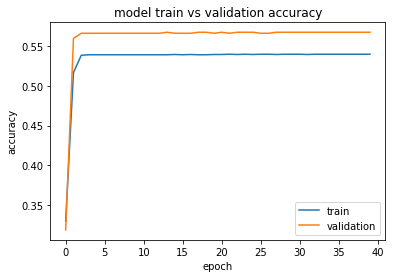

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.50      0.00      0.01       241
          2       0.57      1.00      0.72       438

avg / total       0.48      0.57      0.41       772

Accuracy score: 0.567357512953


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0   0 180]
 [  0   0 369]
 [  0   0 972]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.00      0.00      0.00       369
          2       0.64      1.00      0.78       972

avg / total       0.41      0.64      0.50      1521

Accuracy score: 0.639053254438


In [73]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile0, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))
                                 
BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile0.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=40, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile0)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 1

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 11s 4ms/step - loss: 1.0800 - acc: 0.4901 - val_loss: 1.0116 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9989 - acc: 0.5400 - val_loss: 0.9609 - val_acc: 0.5661
Epoch 3/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9712 - acc: 0.5400 - val_loss: 0.9463 - val_acc: 0.5661
Epoch 4/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9654 - acc: 0.5400 - val_loss: 0.9423 - val_acc: 0.5661
Epoch 5/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9645 - acc: 0.5400 - val_loss: 0.9427 - val_acc: 0.5661
Epoch 6/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9646 - acc: 0.5400 - val_loss: 0.9433 - val_acc: 0.5661
Epoch 7/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9644 - acc: 0.5400 - val

3087/3087 [==============================] - 4s 1ms/step - loss: 0.9533 - acc: 0.5400 - val_loss: 0.9301 - val_acc: 0.5674
Epoch 61/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9520 - acc: 0.5400 - val_loss: 0.9297 - val_acc: 0.5674
Epoch 62/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9513 - acc: 0.5400 - val_loss: 0.9279 - val_acc: 0.5674
Epoch 63/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9497 - acc: 0.5400 - val_loss: 0.9264 - val_acc: 0.5674
Epoch 64/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9484 - acc: 0.5400 - val_loss: 0.9252 - val_acc: 0.5674
Epoch 65/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9470 - acc: 0.5400 - val_loss: 0.9235 - val_acc: 0.5674
Epoch 66/100
3087/3087 [==============================] - 4s 1ms/step - loss: 0.9454 - acc: 0.5400 - val_loss: 0.9221 - val_acc: 0.5674
Epoch 67/100
3087/3087 [==============================] - 4s 

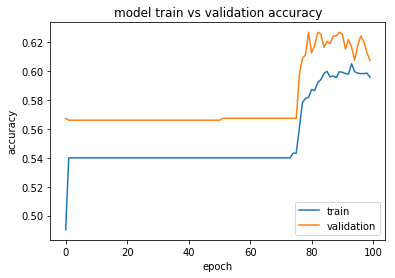

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.57      0.46      0.51       241
          2       0.62      0.82      0.70       438

avg / total       0.53      0.61      0.56       772

Accuracy score: 0.607512953368


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0  55 125]
 [  0 179 190]
 [  0 334 638]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.32      0.49      0.38       369
          2       0.67      0.66      0.66       972

avg / total       0.50      0.54      0.52      1521

Accuracy score: 0.53714661407


In [74]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile1, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile1.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile1)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 2

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.9719 - acc: 0.5400 - val_loss: 0.9439 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.9678 - acc: 0.5420 - val_loss: 0.9317 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.8826 - acc: 0.5889 - val_loss: 0.8605 - val_acc: 0.6295
Epoch 4/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.8517 - acc: 0.6080 - val_loss: 0.7861 - val_acc: 0.6373
Epoch 5/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.8252 - acc: 0.6265 - val_loss: 0.7940 - val_acc: 0.6360
Epoch 6/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.8252 - acc: 0.6158 - val_loss: 0.7940 - val_acc: 0.6192
Epoch 7/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.8235 - acc: 0.6327 - val

3087/3087 [==============================] - 6s 2ms/step - loss: 0.7505 - acc: 0.6524 - val_loss: 0.7389 - val_acc: 0.6671
Epoch 61/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7447 - acc: 0.6631 - val_loss: 0.7464 - val_acc: 0.6541
Epoch 62/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7435 - acc: 0.6576 - val_loss: 0.7698 - val_acc: 0.6412
Epoch 63/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7448 - acc: 0.6657 - val_loss: 0.7418 - val_acc: 0.6580
Epoch 64/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7401 - acc: 0.6654 - val_loss: 0.7496 - val_acc: 0.6477
Epoch 65/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7384 - acc: 0.6576 - val_loss: 0.7452 - val_acc: 0.6606
Epoch 66/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.7411 - acc: 0.6644 - val_loss: 0.7584 - val_acc: 0.6386
Epoch 67/100
3087/3087 [==============================] - 6s 

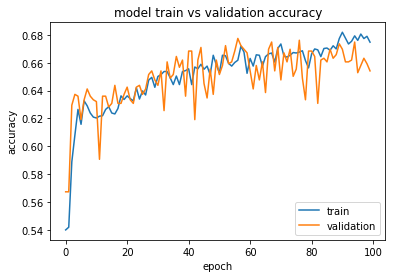

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.44      0.20      0.28        93
          1       0.67      0.56      0.61       241
          2       0.67      0.80      0.73       438

avg / total       0.64      0.65      0.64       772

Accuracy score: 0.65414507772
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 23  82  75]
 [ 15 251 103]
 [ 64 496 412]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.23      0.13      0.16       180
          1       0.30      0.68      0.42       369
          2       0.7

In [75]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile2, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile2.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile2)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 3

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 16s 5ms/step - loss: 1.0184 - acc: 0.4817 - val_loss: 0.9685 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9714 - acc: 0.5400 - val_loss: 0.9445 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9651 - acc: 0.5400 - val_loss: 0.9413 - val_acc: 0.5674
Epoch 4/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9650 - acc: 0.5400 - val_loss: 0.9415 - val_acc: 0.5674
Epoch 5/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9650 - acc: 0.5400 - val_loss: 0.9416 - val_acc: 0.5674
Epoch 6/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9650 - acc: 0.5400 - val_loss: 0.9410 - val_acc: 0.5674
Epoch 7/100
3087/3087 [==============================] - 8s 3ms/step - loss: 0.9649 - acc: 0.5400 - val

Epoch 58/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674
Epoch 59/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674
Epoch 60/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674
Epoch 61/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674
Epoch 62/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674
Epoch 63/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val_loss: 0.9411 - val_acc: 0.5674

Epoch 00063: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
Epoch 64/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.9642 - acc: 0.5400 - val

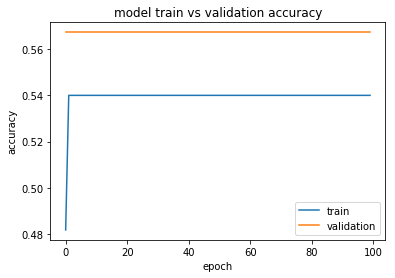

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.00      0.00      0.00       241
          2       0.57      1.00      0.72       438

avg / total       0.32      0.57      0.41       772

Accuracy score: 0.567357512953


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0   0 180]
 [  0   0 369]
 [  0   0 972]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.00      0.00      0.00       369
          2       0.64      1.00      0.78       972

avg / total       0.41      0.64      0.50      1521

Accuracy score: 0.639053254438


In [76]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile3, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile3.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile3)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 4

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/200
3087/3087 [==============================] - 18s 6ms/step - loss: 0.9883 - acc: 0.5057 - val_loss: 0.9410 - val_acc: 0.5674
Epoch 2/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9665 - acc: 0.5400 - val_loss: 0.9400 - val_acc: 0.5674
Epoch 3/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9662 - acc: 0.5400 - val_loss: 0.9414 - val_acc: 0.5674
Epoch 4/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9655 - acc: 0.5400 - val_loss: 0.9415 - val_acc: 0.5674
Epoch 5/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9664 - acc: 0.5400 - val_loss: 0.9442 - val_acc: 0.5674
Epoch 6/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9660 - acc: 0.5400 - val_loss: 0.9447 - val_acc: 0.5674
Epoch 7/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.9649 - acc: 0.5400

3087/3087 [==============================] - 10s 3ms/step - loss: 0.7534 - acc: 0.6589 - val_loss: 0.7279 - val_acc: 0.6697
Epoch 61/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.7515 - acc: 0.6566 - val_loss: 0.7321 - val_acc: 0.6671
Epoch 62/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7534 - acc: 0.6527 - val_loss: 0.7395 - val_acc: 0.6554
Epoch 63/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.7519 - acc: 0.6521 - val_loss: 0.7627 - val_acc: 0.6308
Epoch 64/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.7465 - acc: 0.6573 - val_loss: 0.7682 - val_acc: 0.6580
Epoch 65/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.7515 - acc: 0.6534 - val_loss: 0.7355 - val_acc: 0.6671
Epoch 66/200
3087/3087 [==============================] - 10s 3ms/step - loss: 0.7501 - acc: 0.6573 - val_loss: 0.7344 - val_acc: 0.6632
Epoch 67/200
3087/3087 [==============================

3087/3087 [==============================] - 11s 3ms/step - loss: 0.7224 - acc: 0.6696 - val_loss: 0.7170 - val_acc: 0.6710

Epoch 00118: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 119/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7211 - acc: 0.6676 - val_loss: 0.7228 - val_acc: 0.6671
Epoch 120/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7218 - acc: 0.6686 - val_loss: 0.7205 - val_acc: 0.6697
Epoch 121/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7198 - acc: 0.6722 - val_loss: 0.7266 - val_acc: 0.6723
Epoch 122/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7206 - acc: 0.6712 - val_loss: 0.7162 - val_acc: 0.6736
Epoch 123/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7212 - acc: 0.6693 - val_loss: 0.7169 - val_acc: 0.6671
Epoch 124/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7215 - acc: 0.6683 - val

Epoch 174/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6693 - val_loss: 0.7169 - val_acc: 0.6723
Epoch 175/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6693 - val_loss: 0.7168 - val_acc: 0.6723
Epoch 176/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6699 - val_loss: 0.7169 - val_acc: 0.6723
Epoch 177/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6696 - val_loss: 0.7169 - val_acc: 0.6723
Epoch 178/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6706 - val_loss: 0.7170 - val_acc: 0.6723

Epoch 00178: ReduceLROnPlateau reducing learning rate to 1e-06.
Epoch 179/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6689 - val_loss: 0.7170 - val_acc: 0.6723
Epoch 180/200
3087/3087 [==============================] - 11s 3ms/step - loss: 0.7179 - acc: 0.6696 - val_

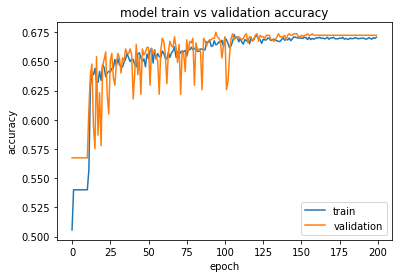

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.73      0.54      0.62       241
          2       0.66      0.89      0.76       438

avg / total       0.60      0.67      0.62       772

Accuracy score: 0.672279792746


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0  70 110]
 [  0 205 164]
 [  0 408 564]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.30      0.56      0.39       369
          2       0.67      0.58      0.62       972

avg / total       0.50      0.51      0.49      1521

Accuracy score: 0.505588428665


In [77]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile4, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile4.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=RMSprop(lr=0.0005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=200, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile4)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 5

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 20s 7ms/step - loss: 1.0049 - acc: 0.5005 - val_loss: 0.9444 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.9669 - acc: 0.5400 - val_loss: 0.9473 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.9671 - acc: 0.5400 - val_loss: 0.9386 - val_acc: 0.5674
Epoch 4/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.9625 - acc: 0.5400 - val_loss: 0.9361 - val_acc: 0.5674
Epoch 5/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.9388 - acc: 0.5400 - val_loss: 0.8867 - val_acc: 0.5674
Epoch 6/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.8848 - acc: 0.5821 - val_loss: 0.8173 - val_acc: 0.6541
Epoch 7/100
3087/3087 [==============================] - 12s 4ms/step - loss: 0.8546 - acc: 0.6203

3087/3087 [==============================] - 13s 4ms/step - loss: 0.7054 - acc: 0.6926 - val_loss: 0.6944 - val_acc: 0.6995
Epoch 60/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7094 - acc: 0.6945 - val_loss: 0.7089 - val_acc: 0.6995
Epoch 61/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7040 - acc: 0.6932 - val_loss: 0.7080 - val_acc: 0.6995
Epoch 62/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7077 - acc: 0.6961 - val_loss: 0.7009 - val_acc: 0.6904
Epoch 63/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7050 - acc: 0.6916 - val_loss: 0.6954 - val_acc: 0.7060
Epoch 64/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7030 - acc: 0.6919 - val_loss: 0.7411 - val_acc: 0.6813
Epoch 65/100
3087/3087 [==============================] - 13s 4ms/step - loss: 0.7068 - acc: 0.6893 - val_loss: 0.7148 - val_acc: 0.7034
Epoch 66/100
3087/3087 [==============================

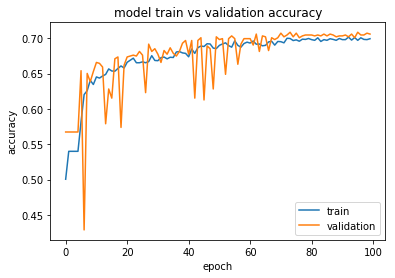

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.87      0.52      0.65       241
          2       0.67      0.96      0.79       438

avg / total       0.65      0.71      0.65       772

Accuracy score: 0.705958549223


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0  17 163]
 [  0 219 150]
 [  0 251 721]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.45      0.59      0.51       369
          2       0.70      0.74      0.72       972

avg / total       0.55      0.62      0.58      1521

Accuracy score: 0.618014464168


In [78]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile5, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile5.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile5)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 6

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/70
3087/3087 [==============================] - 22s 7ms/step - loss: 1.0070 - acc: 0.4950 - val_loss: 0.9413 - val_acc: 0.5674
Epoch 2/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.9668 - acc: 0.5400 - val_loss: 0.9416 - val_acc: 0.5674
Epoch 3/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.9667 - acc: 0.5400 - val_loss: 0.9398 - val_acc: 0.5674
Epoch 4/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.9660 - acc: 0.5400 - val_loss: 0.9401 - val_acc: 0.5674
Epoch 5/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.9648 - acc: 0.5400 - val_loss: 0.9364 - val_acc: 0.5674
Epoch 6/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.9496 - acc: 0.5400 - val_loss: 0.8913 - val_acc: 0.5674
Epoch 7/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.8183 - acc: 0.6501 - val_

3087/3087 [==============================] - 14s 5ms/step - loss: 0.6504 - acc: 0.7240 - val_loss: 0.6682 - val_acc: 0.7150
Epoch 61/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.6563 - acc: 0.7221 - val_loss: 0.6764 - val_acc: 0.6995
Epoch 62/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.6593 - acc: 0.7224 - val_loss: 0.6585 - val_acc: 0.7150
Epoch 63/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.6615 - acc: 0.7230 - val_loss: 0.6602 - val_acc: 0.7163
Epoch 64/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.6657 - acc: 0.7140 - val_loss: 0.6562 - val_acc: 0.7241
Epoch 65/70
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6467 - acc: 0.7247 - val_loss: 0.6547 - val_acc: 0.7254
Epoch 66/70
3087/3087 [==============================] - 14s 5ms/step - loss: 0.6479 - acc: 0.7250 - val_loss: 0.6816 - val_acc: 0.7124
Epoch 67/70
3087/3087 [==============================] - 14s

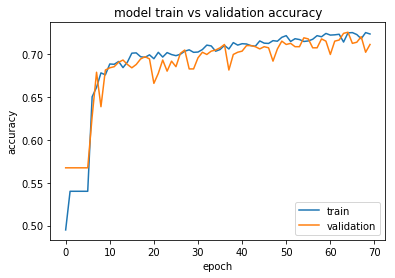

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.88      0.54      0.66       241
          2       0.67      0.96      0.79       438

avg / total       0.66      0.71      0.66       772

Accuracy score: 0.711139896373


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0   2 178]
 [  0 196 173]
 [  0  66 906]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.74      0.53      0.62       369
          2       0.72      0.93      0.81       972

avg / total       0.64      0.72      0.67      1521

Accuracy score: 0.724523339908


In [79]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile6, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile6.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile6)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 7

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 25s 8ms/step - loss: 0.9814 - acc: 0.5400 - val_loss: 0.9403 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.9658 - acc: 0.5400 - val_loss: 0.9419 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 17s 5ms/step - loss: 0.9649 - acc: 0.5400 - val_loss: 0.9356 - val_acc: 0.5674
Epoch 4/100
3087/3087 [==============================] - 17s 5ms/step - loss: 0.9244 - acc: 0.5601 - val_loss: 0.8261 - val_acc: 0.6697
Epoch 5/100
3087/3087 [==============================] - 17s 5ms/step - loss: 0.7864 - acc: 0.6479 - val_loss: 0.7725 - val_acc: 0.6516
Epoch 6/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.7281 - acc: 0.6735 - val_loss: 0.7374 - val_acc: 0.6528
Epoch 7/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.7256 - acc: 0.6725

3087/3087 [==============================] - 17s 6ms/step - loss: 0.5904 - acc: 0.7499 - val_loss: 0.5859 - val_acc: 0.7474
Epoch 61/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5909 - acc: 0.7509 - val_loss: 0.6052 - val_acc: 0.7267
Epoch 62/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5859 - acc: 0.7509 - val_loss: 0.5888 - val_acc: 0.7474
Epoch 63/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.5847 - acc: 0.7515 - val_loss: 0.6189 - val_acc: 0.7358
Epoch 64/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5926 - acc: 0.7522 - val_loss: 0.5963 - val_acc: 0.7487
Epoch 65/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5894 - acc: 0.7467 - val_loss: 0.5950 - val_acc: 0.7552
Epoch 66/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5790 - acc: 0.7473 - val_loss: 0.5725 - val_acc: 0.7617
Epoch 67/100
3087/3087 [==============================

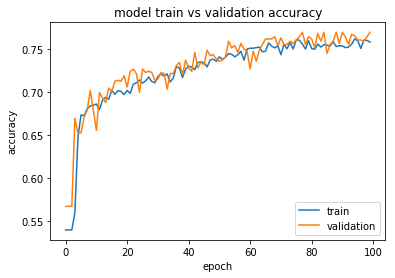

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.64      0.27      0.38        93
          1       0.92      0.65      0.76       241
          2       0.73      0.94      0.82       438

avg / total       0.78      0.77      0.75       772

Accuracy score: 0.769430051813
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 14  15 151]
 [  1 304  64]
 [  6 250 716]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.08      0.14       180
          1       0.53      0.82      0.65       369
          2       0.

In [80]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile7, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile7.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile7)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 8

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 28s 9ms/step - loss: 0.9668 - acc: 0.5400 - val_loss: 0.9441 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.9673 - acc: 0.5400 - val_loss: 0.9440 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.9662 - acc: 0.5400 - val_loss: 0.9401 - val_acc: 0.5674
Epoch 4/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.9359 - acc: 0.5549 - val_loss: 0.8442 - val_acc: 0.6710
Epoch 5/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.7821 - acc: 0.6576 - val_loss: 0.7120 - val_acc: 0.6956
Epoch 6/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.7093 - acc: 0.6832 - val_loss: 0.7042 - val_acc: 0.6969
Epoch 7/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.7101 - acc: 0.6790

3087/3087 [==============================] - 19s 6ms/step - loss: 0.5445 - acc: 0.7645 - val_loss: 0.5469 - val_acc: 0.7759
Epoch 61/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.5562 - acc: 0.7609 - val_loss: 0.5728 - val_acc: 0.7617
Epoch 62/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.5543 - acc: 0.7577 - val_loss: 0.5363 - val_acc: 0.7746
Epoch 63/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.5442 - acc: 0.7632 - val_loss: 0.5590 - val_acc: 0.7707
Epoch 64/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.5576 - acc: 0.7580 - val_loss: 0.5336 - val_acc: 0.7733
Epoch 65/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.5409 - acc: 0.7629 - val_loss: 0.5369 - val_acc: 0.7824
Epoch 66/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.5599 - acc: 0.7609 - val_loss: 0.5370 - val_acc: 0.7927
Epoch 67/100
3087/3087 [==============================

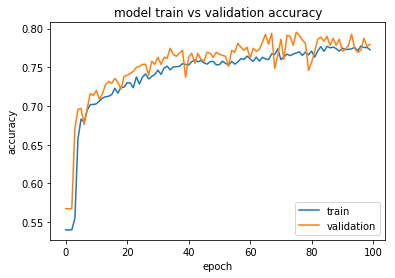

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.25      0.35        93
          1       0.91      0.71      0.80       241
          2       0.75      0.93      0.83       438

avg / total       0.78      0.78      0.76       772

Accuracy score: 0.779792746114
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 14   0 166]
 [  0 276  93]
 [  7  85 880]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.67      0.08      0.14       180
          1       0.76      0.75      0.76       369
          2       0.

In [81]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile8, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile8.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile8)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 9

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 29s 10ms/step - loss: 0.9697 - acc: 0.5400 - val_loss: 0.9429 - val_acc: 0.5674
Epoch 2/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9660 - acc: 0.5400 - val_loss: 0.9428 - val_acc: 0.5674
Epoch 3/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9669 - acc: 0.5400 - val_loss: 0.9437 - val_acc: 0.5674
Epoch 4/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9660 - acc: 0.5400 - val_loss: 0.9426 - val_acc: 0.5674
Epoch 5/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9648 - acc: 0.5400 - val_loss: 0.9461 - val_acc: 0.5674
Epoch 6/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9655 - acc: 0.5400 - val_loss: 0.9384 - val_acc: 0.5674
Epoch 7/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.9522 - acc: 0.540

3087/3087 [==============================] - 21s 7ms/step - loss: 0.5825 - acc: 0.7622 - val_loss: 0.5953 - val_acc: 0.7668
Epoch 61/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.5879 - acc: 0.7593 - val_loss: 0.5869 - val_acc: 0.7707
Epoch 62/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.5833 - acc: 0.7609 - val_loss: 0.5734 - val_acc: 0.7681
Epoch 63/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.5787 - acc: 0.7684 - val_loss: 0.5772 - val_acc: 0.7720
Epoch 64/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.5808 - acc: 0.7645 - val_loss: 0.5746 - val_acc: 0.7733
Epoch 65/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.5809 - acc: 0.7619 - val_loss: 0.5749 - val_acc: 0.7694
Epoch 66/100
3087/3087 [==============================] - 22s 7ms/step - loss: 0.5779 - acc: 0.7664 - val_loss: 0.5727 - val_acc: 0.7707
Epoch 67/100
3087/3087 [==============================

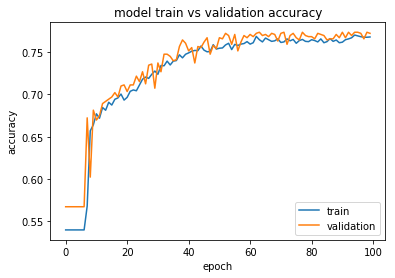

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        93
          1       0.89      0.75      0.81       241
          2       0.73      0.95      0.83       438

avg / total       0.69      0.77      0.72       772

Accuracy score: 0.772020725389


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0   0 180]
 [  0 282  87]
 [  0  93 879]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.75      0.76      0.76       369
          2       0.77      0.90      0.83       972

avg / total       0.67      0.76      0.71      1521

Accuracy score: 0.763313609467


In [82]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile9, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile9.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.0000025, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_Decile9)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 10 (full dataset)

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/125
3087/3087 [==============================] - 41s 13ms/step - loss: 0.9693 - acc: 0.5400 - val_loss: 0.9405 - val_acc: 0.5674
Epoch 2/125
3087/3087 [==============================] - 30s 10ms/step - loss: 0.9665 - acc: 0.5400 - val_loss: 0.9398 - val_acc: 0.5674
Epoch 3/125
3087/3087 [==============================] - 30s 10ms/step - loss: 0.9670 - acc: 0.5400 - val_loss: 0.9397 - val_acc: 0.5674
Epoch 4/125
3087/3087 [==============================] - 30s 10ms/step - loss: 0.9651 - acc: 0.5400 - val_loss: 0.9363 - val_acc: 0.5674
Epoch 5/125
3087/3087 [==============================] - 30s 10ms/step - loss: 0.8993 - acc: 0.5902 - val_loss: 0.7829 - val_acc: 0.6554
Epoch 6/125
3087/3087 [==============================] - 30s 10ms/step - loss: 0.7836 - acc: 0.6518 - val_loss: 0.7299 - val_acc: 0.6684
Epoch 7/125
3087/3087 [==============================] - 31s 10ms/step - loss: 0.7292 - acc:

Epoch 60/125
3087/3087 [==============================] - 27s 9ms/step - loss: 0.5386 - acc: 0.7716 - val_loss: 0.5591 - val_acc: 0.7824
Epoch 61/125
3087/3087 [==============================] - 28s 9ms/step - loss: 0.5442 - acc: 0.7694 - val_loss: 0.5308 - val_acc: 0.7850
Epoch 62/125
3087/3087 [==============================] - 26s 8ms/step - loss: 0.5372 - acc: 0.7723 - val_loss: 0.5368 - val_acc: 0.7850
Epoch 63/125
3087/3087 [==============================] - 25s 8ms/step - loss: 0.5430 - acc: 0.7645 - val_loss: 0.5318 - val_acc: 0.7915
Epoch 64/125
3087/3087 [==============================] - 26s 8ms/step - loss: 0.5316 - acc: 0.7690 - val_loss: 0.5261 - val_acc: 0.7850
Epoch 65/125
3087/3087 [==============================] - 25s 8ms/step - loss: 0.5367 - acc: 0.7723 - val_loss: 0.5575 - val_acc: 0.7655
Epoch 66/125
3087/3087 [==============================] - 25s 8ms/step - loss: 0.5413 - acc: 0.7687 - val_loss: 0.5331 - val_acc: 0.7876
Epoch 67/125
3087/3087 [=================

Epoch 118/125
3087/3087 [==============================] - 25s 8ms/step - loss: 0.5015 - acc: 0.7859 - val_loss: 0.5135 - val_acc: 0.7940
Epoch 119/125
3087/3087 [==============================] - 23s 7ms/step - loss: 0.5002 - acc: 0.7856 - val_loss: 0.5191 - val_acc: 0.7850
Epoch 120/125
3087/3087 [==============================] - 23s 7ms/step - loss: 0.5003 - acc: 0.7833 - val_loss: 0.5157 - val_acc: 0.7979
Epoch 121/125
3087/3087 [==============================] - 23s 7ms/step - loss: 0.5004 - acc: 0.7852 - val_loss: 0.5170 - val_acc: 0.7927
Epoch 122/125
3087/3087 [==============================] - 23s 7ms/step - loss: 0.5000 - acc: 0.7839 - val_loss: 0.5130 - val_acc: 0.7979
Epoch 123/125
3087/3087 [==============================] - 23s 7ms/step - loss: 0.5001 - acc: 0.7784 - val_loss: 0.5130 - val_acc: 0.7953
Epoch 124/125
3087/3087 [==============================] - 23s 8ms/step - loss: 0.4998 - acc: 0.7839 - val_loss: 0.5183 - val_acc: 0.7863
Epoch 125/125
3087/3087 [=========

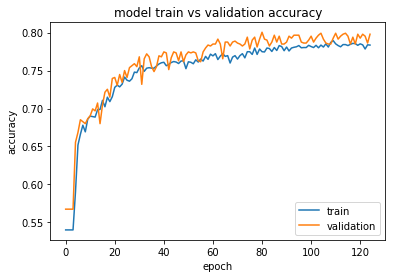

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.62      0.32      0.43        93
          1       0.92      0.76      0.83       241
          2       0.77      0.92      0.84       438

avg / total       0.80      0.80      0.79       772

Accuracy score: 0.79792746114
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 20   2 158]
 [  0 318  51]
 [  7 218 747]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.74      0.11      0.19       180
          1       0.59      0.86      0.70       369
          2       0.7

In [85]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_3D, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile10.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(3, activation='softmax'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.0000025, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train_HE, epochs=125, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict_classes(BBB_Test_3D)

    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))



In [50]:
BBB_Train_Decile0.shape

(3859, 23, 3)

In [48]:
DDD_Train_Targets_

(2831,)

In [47]:
DDD_Train_Decile0.shape

(3859, 25, 3)

# DDD LSTMs for every timestep

### DDD Pre-course (Decile 0)

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/200
2264/2264 [==============================] - 7s 3ms/step - loss: 1.0166 - acc: 0.4691 - val_loss: 0.8848 - val_acc: 0.5661
Epoch 2/200
2264/2264 [==============================] - 2s 685us/step - loss: 0.9375 - acc: 0.5415 - val_loss: 0.8895 - val_acc: 0.5661
Epoch 3/200
2264/2264 [==============================] - 2s 684us/step - loss: 0.9356 - acc: 0.5415 - val_loss: 0.8904 - val_acc: 0.5661
Epoch 4/200
2264/2264 [==============================] - 2s 696us/step - loss: 0.9363 - acc: 0.5415 - val_loss: 0.8877 - val_acc: 0.5661
Epoch 5/200
2264/2264 [==============================] - 2s 701us/step - loss: 0.9351 - acc: 0.5415 - val_loss: 0.8891 - val_acc: 0.5661
Epoch 6/200
2264/2264 [==============================] - 2s 697us/step - loss: 0.9351 - acc: 0.5415 - val_loss: 0.8936 - val_acc: 0.5661
Epoch 7/200
2264/2264 [==============================] - 2s 692us/step - loss: 0.9368 - acc: 0

Epoch 57/200
2264/2264 [==============================] - 2s 699us/step - loss: 0.9310 - acc: 0.5420 - val_loss: 0.8842 - val_acc: 0.5679
Epoch 58/200
2264/2264 [==============================] - 2s 702us/step - loss: 0.9310 - acc: 0.5420 - val_loss: 0.8843 - val_acc: 0.5679
Epoch 59/200
2264/2264 [==============================] - 2s 699us/step - loss: 0.9310 - acc: 0.5420 - val_loss: 0.8840 - val_acc: 0.5679
Epoch 60/200
2264/2264 [==============================] - 2s 698us/step - loss: 0.9309 - acc: 0.5420 - val_loss: 0.8841 - val_acc: 0.5679
Epoch 61/200
2264/2264 [==============================] - 2s 695us/step - loss: 0.9308 - acc: 0.5420 - val_loss: 0.8841 - val_acc: 0.5679

Epoch 00061: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 62/200
2264/2264 [==============================] - 2s 694us/step - loss: 0.9308 - acc: 0.5420 - val_loss: 0.8840 - val_acc: 0.5679
Epoch 63/200
2264/2264 [==============================] - 2s 702us/step - loss: 0.9307 - a

2264/2264 [==============================] - 2s 699us/step - loss: 0.9300 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 114/200
2264/2264 [==============================] - 2s 701us/step - loss: 0.9300 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 115/200
2264/2264 [==============================] - 2s 700us/step - loss: 0.9299 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 116/200
2264/2264 [==============================] - 2s 701us/step - loss: 0.9299 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 117/200
2264/2264 [==============================] - 2s 697us/step - loss: 0.9299 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 118/200
2264/2264 [==============================] - 2s 698us/step - loss: 0.9299 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 119/200
2264/2264 [==============================] - 2s 696us/step - loss: 0.9299 - acc: 0.5420 - val_loss: 0.8831 - val_acc: 0.5679
Epoch 120/200
2264/2264 [================

2264/2264 [==============================] - 2s 707us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 173/200
2264/2264 [==============================] - 2s 698us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 174/200
2264/2264 [==============================] - 2s 697us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 175/200
2264/2264 [==============================] - 2s 694us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 176/200
2264/2264 [==============================] - 2s 701us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 177/200
2264/2264 [==============================] - 2s 704us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 178/200
2264/2264 [==============================] - 2s 705us/step - loss: 0.9298 - acc: 0.5420 - val_loss: 0.8830 - val_acc: 0.5679
Epoch 179/200
2264/2264 [================

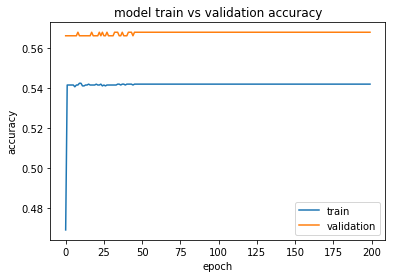

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        41
          1       0.50      0.01      0.02       204
          2       0.57      0.99      0.72       322

avg / total       0.50      0.57      0.42       567

Accuracy score: 0.567901234568


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0   0 112]
 [  0   1 357]
 [  0   0 680]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       1.00      0.00      0.01       358
          2       0.59      1.00      0.74       680

avg / total       0.66      0.59      0.44      1150

Accuracy score: 0.592173913043


In [62]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile0, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile0.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=200, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile0)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 1

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.9537 - acc: 0.5274 - val_loss: 0.8918 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.9377 - acc: 0.5411 - val_loss: 0.8868 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.9286 - acc: 0.5411 - val_loss: 0.8308 - val_acc: 0.5679
Epoch 4/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.8593 - acc: 0.6091 - val_loss: 0.7750 - val_acc: 0.6455
Epoch 5/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.8145 - acc: 0.6391 - val_loss: 0.8201 - val_acc: 0.5961
Epoch 6/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.8018 - acc: 0.6444 - val_loss: 0.7574 - val_acc: 0.6949
Epoch 7/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7935 - acc: 0.6511 - val_

Epoch 59/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7250 - acc: 0.6762 - val_loss: 0.7226 - val_acc: 0.6878
Epoch 60/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7244 - acc: 0.6789 - val_loss: 0.7254 - val_acc: 0.6878
Epoch 61/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7259 - acc: 0.6815 - val_loss: 0.7259 - val_acc: 0.6825
Epoch 62/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7242 - acc: 0.6740 - val_loss: 0.7255 - val_acc: 0.6825
Epoch 63/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7234 - acc: 0.6762 - val_loss: 0.7254 - val_acc: 0.6878

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 64/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7233 - acc: 0.6789 - val_loss: 0.7226 - val_acc: 0.6931
Epoch 65/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.7228 - acc: 0.6789 - va

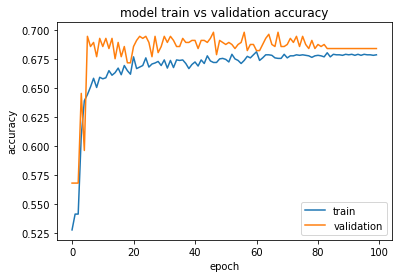

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.35      0.15      0.21        41
          1       0.70      0.58      0.63       204
          2       0.69      0.82      0.75       322

avg / total       0.67      0.68      0.67       567

Accuracy score: 0.68430335097
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 34   3  75]
 [ 10 146 202]
 [ 52  75 553]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.35      0.30      0.33       112
          1       0.65      0.41      0.50       358
          2       0.6

In [63]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile1, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile1.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile1)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 2

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.9426 - acc: 0.5349 - val_loss: 0.8798 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.9365 - acc: 0.5406 - val_loss: 0.8778 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.9229 - acc: 0.5393 - val_loss: 0.8927 - val_acc: 0.5679
Epoch 4/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.8581 - acc: 0.6078 - val_loss: 0.7359 - val_acc: 0.6878
Epoch 5/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.7668 - acc: 0.6754 - val_loss: 0.7616 - val_acc: 0.6825
Epoch 6/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.7683 - acc: 0.6705 - val_loss: 0.7247 - val_acc: 0.6931
Epoch 7/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.7578 - acc: 0.6687 - val

2264/2264 [==============================] - 4s 2ms/step - loss: 0.6943 - acc: 0.6868 - val_loss: 0.6888 - val_acc: 0.6966
Epoch 61/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6975 - acc: 0.6873 - val_loss: 0.6818 - val_acc: 0.7002
Epoch 62/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6988 - acc: 0.6824 - val_loss: 0.6856 - val_acc: 0.7002
Epoch 63/100
2264/2264 [==============================] - 5s 2ms/step - loss: 0.6958 - acc: 0.6921 - val_loss: 0.7120 - val_acc: 0.6843
Epoch 64/100
2264/2264 [==============================] - 5s 2ms/step - loss: 0.6941 - acc: 0.6868 - val_loss: 0.6948 - val_acc: 0.6931
Epoch 65/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6988 - acc: 0.6842 - val_loss: 0.6858 - val_acc: 0.6984
Epoch 66/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6950 - acc: 0.6890 - val_loss: 0.6901 - val_acc: 0.6896
Epoch 67/100
2264/2264 [==============================] - 4s 

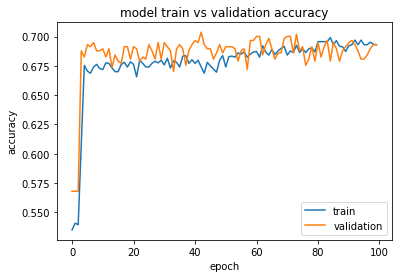

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.33      0.10      0.15        41
          1       0.70      0.64      0.66       204
          2       0.70      0.80      0.75       322

avg / total       0.67      0.69      0.68       567

Accuracy score: 0.693121693122
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 32   9  71]
 [  5 213 140]
 [ 51 107 522]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.29      0.32       112
          1       0.65      0.59      0.62       358
          2       0.

In [64]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile2, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile2.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile2)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 3

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 11s 5ms/step - loss: 0.9562 - acc: 0.5256 - val_loss: 0.8991 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.9354 - acc: 0.5411 - val_loss: 0.8811 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.9210 - acc: 0.5654 - val_loss: 0.7661 - val_acc: 0.6861
Epoch 4/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.7924 - acc: 0.6511 - val_loss: 0.6906 - val_acc: 0.6949
Epoch 5/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.7465 - acc: 0.6670 - val_loss: 0.6879 - val_acc: 0.7072
Epoch 6/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.7092 - acc: 0.6899 - val_loss: 0.6811 - val_acc: 0.7019
Epoch 7/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.7202 - acc: 0.6718 - val

2264/2264 [==============================] - 6s 3ms/step - loss: 0.6427 - acc: 0.7178 - val_loss: 0.6618 - val_acc: 0.6931

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 61/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6305 - acc: 0.7142 - val_loss: 0.6625 - val_acc: 0.6931
Epoch 62/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6294 - acc: 0.7085 - val_loss: 0.6521 - val_acc: 0.7002
Epoch 63/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6281 - acc: 0.7195 - val_loss: 0.6574 - val_acc: 0.6914
Epoch 64/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6307 - acc: 0.7200 - val_loss: 0.6605 - val_acc: 0.7055
Epoch 65/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6292 - acc: 0.7200 - val_loss: 0.6522 - val_acc: 0.7019
Epoch 66/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6305 - acc: 0.7186 - val_loss: 0.652

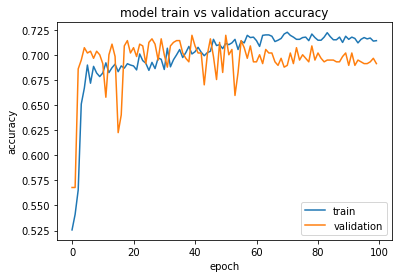

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.22      0.27        41
          1       0.74      0.57      0.65       204
          2       0.69      0.83      0.75       322

avg / total       0.69      0.69      0.68       567

Accuracy score: 0.691358024691
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 20   3  89]
 [  3 210 145]
 [ 23  77 580]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.43      0.18      0.25       112
          1       0.72      0.59      0.65       358
          2       0.

In [65]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile3, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile3.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile3)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 4

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.9477 - acc: 0.5309 - val_loss: 0.8802 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.9286 - acc: 0.5433 - val_loss: 0.8822 - val_acc: 0.5450
Epoch 3/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.7951 - acc: 0.6736 - val_loss: 0.6992 - val_acc: 0.7002
Epoch 4/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.7263 - acc: 0.6921 - val_loss: 0.6737 - val_acc: 0.7178
Epoch 5/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.7180 - acc: 0.6988 - val_loss: 0.6756 - val_acc: 0.7213
Epoch 6/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.7045 - acc: 0.6917 - val_loss: 0.6697 - val_acc: 0.7196
Epoch 7/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6991 - acc: 0.6952 - val

2264/2264 [==============================] - 7s 3ms/step - loss: 0.6146 - acc: 0.7288 - val_loss: 0.6003 - val_acc: 0.7390
Epoch 61/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6138 - acc: 0.7270 - val_loss: 0.6138 - val_acc: 0.7443
Epoch 62/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6225 - acc: 0.7222 - val_loss: 0.6010 - val_acc: 0.7513
Epoch 63/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6171 - acc: 0.7279 - val_loss: 0.5957 - val_acc: 0.7549
Epoch 64/100
2264/2264 [==============================] - 8s 3ms/step - loss: 0.6127 - acc: 0.7359 - val_loss: 0.6465 - val_acc: 0.6861
Epoch 65/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6144 - acc: 0.7279 - val_loss: 0.6070 - val_acc: 0.7372
Epoch 66/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.6222 - acc: 0.7186 - val_loss: 0.6048 - val_acc: 0.7478

Epoch 00066: ReduceLROnPlateau reducing learning rate to 0.0

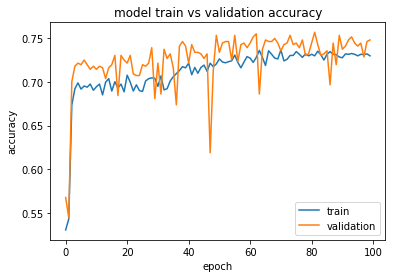

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.46      0.27      0.34        41
          1       0.82      0.64      0.72       204
          2       0.74      0.88      0.80       322

avg / total       0.75      0.75      0.74       567

Accuracy score: 0.747795414462
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 26   9  77]
 [  1 254 103]
 [ 31 126 523]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.45      0.23      0.31       112
          1       0.65      0.71      0.68       358
          2       0.

In [66]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile4, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile4.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile4)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 5

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.9416 - acc: 0.5411 - val_loss: 0.9121 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.8742 - acc: 0.6073 - val_loss: 0.6738 - val_acc: 0.7337
Epoch 3/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.7210 - acc: 0.6899 - val_loss: 0.6705 - val_acc: 0.7337
Epoch 4/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.7102 - acc: 0.6979 - val_loss: 0.6185 - val_acc: 0.7390
Epoch 5/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.6860 - acc: 0.6996 - val_loss: 0.6593 - val_acc: 0.7372
Epoch 6/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.6864 - acc: 0.7094 - val_loss: 0.6138 - val_acc: 0.7425
Epoch 7/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.6667 - acc: 0.7049 - val

2264/2264 [==============================] - 9s 4ms/step - loss: 0.5864 - acc: 0.7403 - val_loss: 0.5400 - val_acc: 0.7654
Epoch 61/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5878 - acc: 0.7292 - val_loss: 0.5318 - val_acc: 0.7760
Epoch 62/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5874 - acc: 0.7337 - val_loss: 0.5432 - val_acc: 0.7619
Epoch 63/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5767 - acc: 0.7385 - val_loss: 0.5306 - val_acc: 0.7690
Epoch 64/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5754 - acc: 0.7429 - val_loss: 0.5638 - val_acc: 0.7496
Epoch 65/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5747 - acc: 0.7456 - val_loss: 0.5263 - val_acc: 0.7725
Epoch 66/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5763 - acc: 0.7314 - val_loss: 0.5635 - val_acc: 0.7425
Epoch 67/100
2264/2264 [==============================] - 9s 

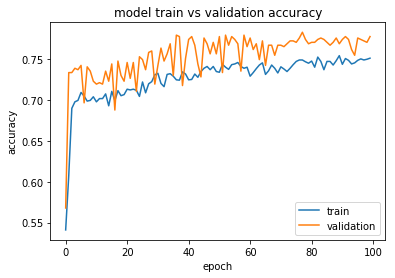

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.39      0.44        41
          1       0.89      0.66      0.75       204
          2       0.76      0.90      0.82       322

avg / total       0.79      0.78      0.77       567

Accuracy score: 0.777777777778
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 32   3  77]
 [  1 241 116]
 [ 43  79 558]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.42      0.29      0.34       112
          1       0.75      0.67      0.71       358
          2       0.

In [67]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile5, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile5.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile5)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 6

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 16s 7ms/step - loss: 0.9518 - acc: 0.5172 - val_loss: 0.8905 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.9339 - acc: 0.5411 - val_loss: 0.8657 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.7652 - acc: 0.6678 - val_loss: 0.6192 - val_acc: 0.7425
Epoch 4/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.7033 - acc: 0.6979 - val_loss: 0.6212 - val_acc: 0.7496
Epoch 5/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.6764 - acc: 0.6983 - val_loss: 0.6031 - val_acc: 0.7478
Epoch 6/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.6557 - acc: 0.7023 - val_loss: 0.6154 - val_acc: 0.7160
Epoch 7/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.6686 - acc: 0.6970

2264/2264 [==============================] - 10s 5ms/step - loss: 0.5638 - acc: 0.7451 - val_loss: 0.5678 - val_acc: 0.7478
Epoch 60/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5668 - acc: 0.7456 - val_loss: 0.5240 - val_acc: 0.7795
Epoch 61/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5562 - acc: 0.7500 - val_loss: 0.5353 - val_acc: 0.7654
Epoch 62/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5577 - acc: 0.7593 - val_loss: 0.5174 - val_acc: 0.7795
Epoch 63/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5655 - acc: 0.7443 - val_loss: 0.5202 - val_acc: 0.7813
Epoch 64/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5554 - acc: 0.7469 - val_loss: 0.5201 - val_acc: 0.7725
Epoch 65/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.5531 - acc: 0.7496 - val_loss: 0.5428 - val_acc: 0.7672
Epoch 66/100
2264/2264 [==============================

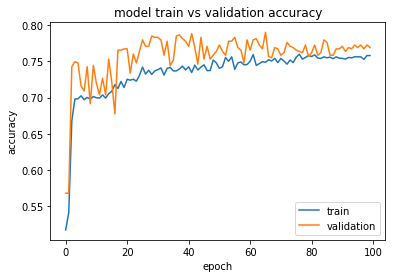

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.24      0.33        41
          1       0.88      0.65      0.75       204
          2       0.74      0.91      0.82       322

avg / total       0.77      0.77      0.76       567

Accuracy score: 0.768959435626
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 23   1  88]
 [  2 198 158]
 [ 20  37 623]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.21      0.29       112
          1       0.84      0.55      0.67       358
          2       0.

In [68]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile6, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile6.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile6)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 7

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 18s 8ms/step - loss: 0.9495 - acc: 0.5305 - val_loss: 0.8986 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.9433 - acc: 0.5411 - val_loss: 0.8777 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.8321 - acc: 0.6378 - val_loss: 0.6643 - val_acc: 0.7319
Epoch 4/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.6790 - acc: 0.7058 - val_loss: 0.6342 - val_acc: 0.7108
Epoch 5/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.6463 - acc: 0.7151 - val_loss: 0.6044 - val_acc: 0.7390
Epoch 6/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.6504 - acc: 0.7160 - val_loss: 0.5760 - val_acc: 0.7672
Epoch 7/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.6464 - acc: 0.7186

2264/2264 [==============================] - 12s 5ms/step - loss: 0.5307 - acc: 0.7641 - val_loss: 0.4912 - val_acc: 0.8007
Epoch 60/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5317 - acc: 0.7690 - val_loss: 0.4987 - val_acc: 0.7901
Epoch 61/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5322 - acc: 0.7668 - val_loss: 0.4878 - val_acc: 0.7919
Epoch 62/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5323 - acc: 0.7677 - val_loss: 0.4912 - val_acc: 0.7954
Epoch 63/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5300 - acc: 0.7655 - val_loss: 0.4966 - val_acc: 0.7901
Epoch 64/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5290 - acc: 0.7655 - val_loss: 0.5280 - val_acc: 0.7619
Epoch 65/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5290 - acc: 0.7672 - val_loss: 0.5041 - val_acc: 0.7831
Epoch 66/100
2264/2264 [==============================

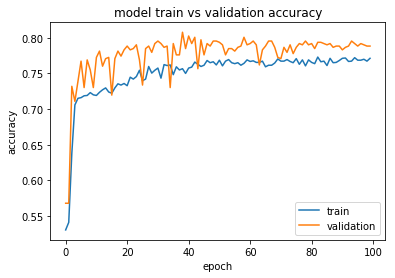

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.32      0.39        41
          1       0.90      0.69      0.78       204
          2       0.76      0.91      0.83       322

avg / total       0.79      0.79      0.78       567

Accuracy score: 0.78835978836
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 35   1  76]
 [  0 231 127]
 [ 35  73 572]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.31      0.38       112
          1       0.76      0.65      0.70       358
          2       0.7

In [69]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile7, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile7.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile7)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 8

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 19s 8ms/step - loss: 0.9670 - acc: 0.5141 - val_loss: 0.8872 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.9383 - acc: 0.5411 - val_loss: 0.8796 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.8476 - acc: 0.6140 - val_loss: 0.7087 - val_acc: 0.6896
Epoch 4/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6798 - acc: 0.7178 - val_loss: 0.5851 - val_acc: 0.7743
Epoch 5/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6477 - acc: 0.7235 - val_loss: 0.5783 - val_acc: 0.7549
Epoch 6/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6364 - acc: 0.7204 - val_loss: 0.6024 - val_acc: 0.7496
Epoch 7/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6406 - acc: 0.7204

2264/2264 [==============================] - 13s 6ms/step - loss: 0.4924 - acc: 0.7756 - val_loss: 0.5098 - val_acc: 0.7425

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 60/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4907 - acc: 0.7756 - val_loss: 0.4833 - val_acc: 0.7795
Epoch 61/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4872 - acc: 0.7778 - val_loss: 0.4546 - val_acc: 0.8148
Epoch 62/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.4899 - acc: 0.7796 - val_loss: 0.4683 - val_acc: 0.7866
Epoch 63/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4881 - acc: 0.7805 - val_loss: 0.4569 - val_acc: 0.8060
Epoch 64/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4859 - acc: 0.7818 - val_loss: 0.4701 - val_acc: 0.7866
Epoch 65/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4865 - acc: 0.7783 - val_loss

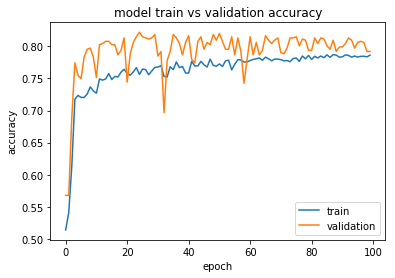

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.47      0.44      0.46        41
          1       0.91      0.71      0.79       204
          2       0.78      0.89      0.83       322

avg / total       0.80      0.79      0.79       567

Accuracy score: 0.79188712522
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 43   0  69]
 [  0 206 152]
 [ 41  22 617]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.38      0.44       112
          1       0.90      0.58      0.70       358
          2       0.7

In [70]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile8, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile8.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile8)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 9

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 21s 9ms/step - loss: 0.9612 - acc: 0.5318 - val_loss: 0.8798 - val_acc: 0.5679
Epoch 2/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.9379 - acc: 0.5411 - val_loss: 0.8827 - val_acc: 0.5679
Epoch 3/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.9187 - acc: 0.5468 - val_loss: 0.8751 - val_acc: 0.5679
Epoch 4/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.7035 - acc: 0.7058 - val_loss: 0.5196 - val_acc: 0.7901
Epoch 5/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.6176 - acc: 0.7496 - val_loss: 0.5082 - val_acc: 0.8095
Epoch 6/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.6058 - acc: 0.7500 - val_loss: 0.4861 - val_acc: 0.8183
Epoch 7/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.5983 - acc: 0.7509

2264/2264 [==============================] - 15s 7ms/step - loss: 0.4511 - acc: 0.7977 - val_loss: 0.4108 - val_acc: 0.8254

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 60/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4475 - acc: 0.8083 - val_loss: 0.4033 - val_acc: 0.8430
Epoch 61/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4471 - acc: 0.8061 - val_loss: 0.4011 - val_acc: 0.8413
Epoch 62/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4478 - acc: 0.8065 - val_loss: 0.4140 - val_acc: 0.8272
Epoch 63/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4460 - acc: 0.8070 - val_loss: 0.4126 - val_acc: 0.8254
Epoch 64/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4452 - acc: 0.8026 - val_loss: 0.4004 - val_acc: 0.8395
Epoch 65/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.4458 - acc: 0.8092 - val_loss

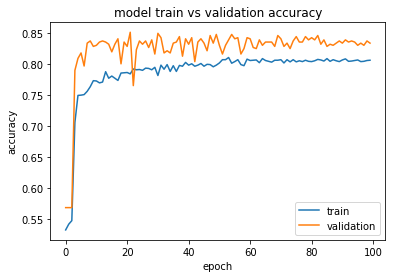

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.41      0.45        41
          1       0.97      0.77      0.86       204
          2       0.81      0.93      0.86       322

avg / total       0.84      0.83      0.83       567

Accuracy score: 0.834215167549
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 34   2  76]
 [  0 256 102]
 [ 26  72 582]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.57      0.30      0.40       112
          1       0.78      0.72      0.74       358
          2       0.

In [71]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile9, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile9.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_Decile9)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 10

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/70
2264/2264 [==============================] - 23s 10ms/step - loss: 0.9420 - acc: 0.5411 - val_loss: 0.8833 - val_acc: 0.5679
Epoch 2/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.9067 - acc: 0.5676 - val_loss: 0.8341 - val_acc: 0.6138
Epoch 3/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.7535 - acc: 0.6705 - val_loss: 0.5726 - val_acc: 0.7901
Epoch 4/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.6493 - acc: 0.7147 - val_loss: 0.5215 - val_acc: 0.7919
Epoch 5/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.6218 - acc: 0.7350 - val_loss: 0.5267 - val_acc: 0.7866
Epoch 6/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.6378 - acc: 0.7279 - val_loss: 0.5012 - val_acc: 0.8060
Epoch 7/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.6112 - acc: 0.7420 - val

2264/2264 [==============================] - 16s 7ms/step - loss: 0.4526 - acc: 0.8074 - val_loss: 0.4028 - val_acc: 0.8219
Epoch 60/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.4487 - acc: 0.8039 - val_loss: 0.3968 - val_acc: 0.8289
Epoch 61/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.4478 - acc: 0.8074 - val_loss: 0.3899 - val_acc: 0.8360
Epoch 62/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.4480 - acc: 0.8043 - val_loss: 0.4088 - val_acc: 0.8272

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 63/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.4447 - acc: 0.8070 - val_loss: 0.3850 - val_acc: 0.8448
Epoch 64/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.4414 - acc: 0.8118 - val_loss: 0.3944 - val_acc: 0.8325
Epoch 65/70
2264/2264 [==============================] - 16s 7ms/step - loss: 0.4439 - acc: 0.8065 - val_loss: 0.38

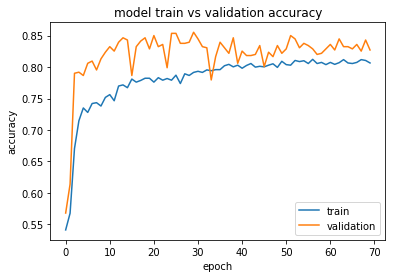

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.44      0.46        41
          1       0.96      0.75      0.85       204
          2       0.80      0.92      0.86       322

avg / total       0.84      0.83      0.83       567

Accuracy score: 0.827160493827
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 46   0  66]
 [  0 234 124]
 [ 39  26 615]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.41      0.47       112
          1       0.90      0.65      0.76       358
          2       0.

In [72]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_3D, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile10.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(3, activation='softmax'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train_HE, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict_classes(DDD_Test_3D)

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))

# FFF LSTMs for every timestep

### FFF Pre-course (Decile 0)

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 5s 2ms/step - loss: 0.9537 - acc: 0.5434 - val_loss: 0.9411 - val_acc: 0.5654
Epoch 2/100
3055/3055 [==============================] - 2s 559us/step - loss: 0.9388 - acc: 0.5535 - val_loss: 0.9399 - val_acc: 0.5681
Epoch 3/100
3055/3055 [==============================] - 2s 554us/step - loss: 0.9394 - acc: 0.5525 - val_loss: 0.9674 - val_acc: 0.5602
Epoch 4/100
3055/3055 [==============================] - 2s 564us/step - loss: 0.9390 - acc: 0.5532 - val_loss: 0.9343 - val_acc: 0.5681
Epoch 5/100
3055/3055 [==============================] - 2s 556us/step - loss: 0.9131 - acc: 0.5529 - val_loss: 0.8926 - val_acc: 0.5798
Epoch 6/100
3055/3055 [==============================] - 2s 549us/step - loss: 0.8985 - acc: 0.5542 - val_loss: 0.8994 - val_acc: 0.5681
Epoch 7/100
3055/3055 [==============================] - 2s 557us/step - loss: 0.8964 - acc: 0

3055/3055 [==============================] - 2s 569us/step - loss: 0.8695 - acc: 0.5876 - val_loss: 0.8951 - val_acc: 0.5746
Epoch 58/100
3055/3055 [==============================] - 2s 553us/step - loss: 0.8709 - acc: 0.5833 - val_loss: 0.8959 - val_acc: 0.5746
Epoch 59/100
3055/3055 [==============================] - 2s 564us/step - loss: 0.8696 - acc: 0.5876 - val_loss: 0.8958 - val_acc: 0.5746
Epoch 60/100
3055/3055 [==============================] - 2s 560us/step - loss: 0.8697 - acc: 0.5879 - val_loss: 0.8991 - val_acc: 0.5707
Epoch 61/100
3055/3055 [==============================] - 2s 556us/step - loss: 0.8694 - acc: 0.5872 - val_loss: 0.8949 - val_acc: 0.5746
Epoch 62/100
3055/3055 [==============================] - 2s 558us/step - loss: 0.8699 - acc: 0.5889 - val_loss: 0.8992 - val_acc: 0.5681
Epoch 63/100
3055/3055 [==============================] - 2s 569us/step - loss: 0.8698 - acc: 0.5856 - val_loss: 0.8960 - val_acc: 0.5733
Epoch 64/100
3055/3055 [=======================

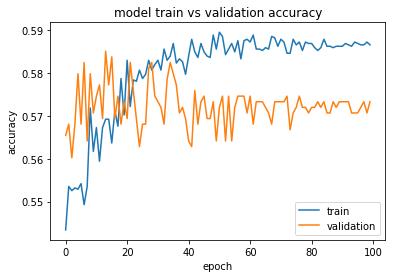

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        89
          1       0.49      0.30      0.37       241
          2       0.59      0.84      0.70       434

avg / total       0.49      0.57      0.51       764

Accuracy score: 0.573298429319


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[  0  21 237]
 [  0 138 249]
 [  0 158 701]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.44      0.36      0.39       387
          2       0.59      0.82      0.69       859

avg / total       0.45      0.56      0.49      1504

Accuracy score: 0.557845744681


In [52]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile0, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile0.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile0)

    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 1

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.9438 - acc: 0.5404 - val_loss: 0.9301 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8494 - acc: 0.5971 - val_loss: 0.8149 - val_acc: 0.6191
Epoch 3/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8311 - acc: 0.6121 - val_loss: 0.8135 - val_acc: 0.6191
Epoch 4/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8300 - acc: 0.6134 - val_loss: 0.8205 - val_acc: 0.6217
Epoch 5/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8247 - acc: 0.6111 - val_loss: 0.8067 - val_acc: 0.6283
Epoch 6/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8303 - acc: 0.6115 - val_loss: 0.8218 - val_acc: 0.6257
Epoch 7/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.8223 - acc: 0.6183 - val_

Epoch 59/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7465 - acc: 0.6442 - val_loss: 0.8267 - val_acc: 0.6204
Epoch 60/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7454 - acc: 0.6475 - val_loss: 0.8235 - val_acc: 0.6047
Epoch 61/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7447 - acc: 0.6429 - val_loss: 0.8239 - val_acc: 0.6165
Epoch 62/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7460 - acc: 0.6445 - val_loss: 0.8239 - val_acc: 0.6086
Epoch 63/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7452 - acc: 0.6429 - val_loss: 0.8268 - val_acc: 0.6139
Epoch 64/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7427 - acc: 0.6445 - val_loss: 0.8306 - val_acc: 0.6152

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 65/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.7398 - acc: 0.6432 - va

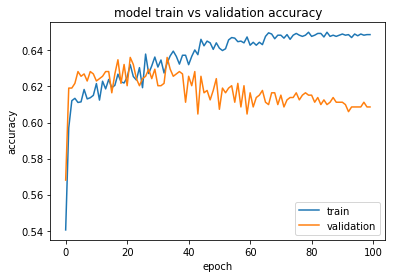

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.28      0.11      0.16        89
          1       0.60      0.52      0.55       241
          2       0.64      0.76      0.69       434

avg / total       0.58      0.61      0.59       764

Accuracy score: 0.608638743455
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 34  21 203]
 [  0 244 143]
 [  8 259 592]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.81      0.13      0.23       258
          1       0.47      0.63      0.54       387
          2       0.

In [53]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile1, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile1.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile1)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 2

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.9463 - acc: 0.5430 - val_loss: 0.9565 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.9368 - acc: 0.5516 - val_loss: 0.9511 - val_acc: 0.5681
Epoch 3/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.8647 - acc: 0.6124 - val_loss: 0.8172 - val_acc: 0.6335
Epoch 4/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.7715 - acc: 0.6471 - val_loss: 0.7967 - val_acc: 0.6453
Epoch 5/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.7617 - acc: 0.6596 - val_loss: 0.7642 - val_acc: 0.6584
Epoch 6/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.7512 - acc: 0.6612 - val_loss: 0.7595 - val_acc: 0.6623
Epoch 7/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.7545 - acc: 0.6612 - val_

3055/3055 [==============================] - 5s 2ms/step - loss: 0.6914 - acc: 0.6779 - val_loss: 0.7017 - val_acc: 0.6872
Epoch 61/100
3055/3055 [==============================] - 5s 2ms/step - loss: 0.6898 - acc: 0.6867 - val_loss: 0.7132 - val_acc: 0.6728
Epoch 62/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6977 - acc: 0.6848 - val_loss: 0.7095 - val_acc: 0.6623

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 63/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6862 - acc: 0.6845 - val_loss: 0.7051 - val_acc: 0.6859
Epoch 64/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6826 - acc: 0.6795 - val_loss: 0.7099 - val_acc: 0.6872
Epoch 65/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6858 - acc: 0.6835 - val_loss: 0.7007 - val_acc: 0.6832
Epoch 66/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6830 - acc: 0.6818 - val_loss: 0.703

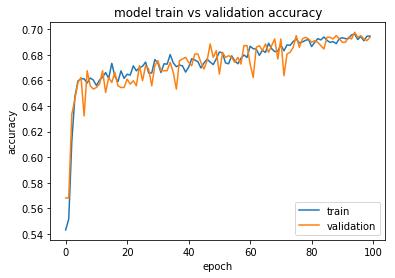

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.22      0.31        89
          1       0.73      0.60      0.66       241
          2       0.69      0.84      0.76       434

avg / total       0.68      0.69      0.68       764

Accuracy score: 0.693717277487
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 67   7 184]
 [  2 245 140]
 [ 39 161 659]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.62      0.26      0.37       258
          1       0.59      0.63      0.61       387
          2       0.

In [54]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile2, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile2.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile2)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 3

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.9565 - acc: 0.5411 - val_loss: 0.9361 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 8s 2ms/step - loss: 0.9339 - acc: 0.5516 - val_loss: 0.9331 - val_acc: 0.5681
Epoch 3/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.8660 - acc: 0.5859 - val_loss: 0.7785 - val_acc: 0.6715
Epoch 4/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.7665 - acc: 0.6458 - val_loss: 0.8149 - val_acc: 0.6113
Epoch 5/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.7377 - acc: 0.6697 - val_loss: 0.7193 - val_acc: 0.6688
Epoch 6/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.7281 - acc: 0.6622 - val_loss: 0.7327 - val_acc: 0.6597
Epoch 7/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.7210 - acc: 0.6622 - val

3055/3055 [==============================] - 8s 3ms/step - loss: 0.6547 - acc: 0.6956 - val_loss: 0.6985 - val_acc: 0.6584

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 61/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6529 - acc: 0.6943 - val_loss: 0.6398 - val_acc: 0.7186
Epoch 62/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6459 - acc: 0.6995 - val_loss: 0.6394 - val_acc: 0.7160
Epoch 63/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6440 - acc: 0.7015 - val_loss: 0.6520 - val_acc: 0.6950
Epoch 64/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6413 - acc: 0.7018 - val_loss: 0.6369 - val_acc: 0.7107
Epoch 65/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6449 - acc: 0.7011 - val_loss: 0.6411 - val_acc: 0.7120
Epoch 66/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6432 - acc: 0.7002 - val_loss: 0.636

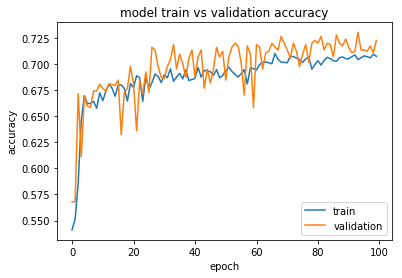

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.39      0.48        89
          1       0.76      0.62      0.68       241
          2       0.72      0.85      0.78       434

avg / total       0.72      0.72      0.71       764

Accuracy score: 0.722513089005
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[106   0 152]
 [  1 223 163]
 [ 54  76 729]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.66      0.41      0.51       258
          1       0.75      0.58      0.65       387
          2       0.

In [55]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile3, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile3.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile3)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 4

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 13s 4ms/step - loss: 0.9432 - acc: 0.5466 - val_loss: 0.9400 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.8677 - acc: 0.5951 - val_loss: 0.7479 - val_acc: 0.6767
Epoch 3/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.7117 - acc: 0.6923 - val_loss: 0.7024 - val_acc: 0.6846
Epoch 4/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.7072 - acc: 0.6858 - val_loss: 0.7021 - val_acc: 0.6885
Epoch 5/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.7053 - acc: 0.6900 - val_loss: 0.6702 - val_acc: 0.7147
Epoch 6/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.6857 - acc: 0.6985 - val_loss: 0.6735 - val_acc: 0.7042
Epoch 7/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.6968 - acc: 0.6913 - va

3055/3055 [==============================] - 10s 3ms/step - loss: 0.5816 - acc: 0.7391 - val_loss: 0.5844 - val_acc: 0.7382
Epoch 61/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5816 - acc: 0.7424 - val_loss: 0.5888 - val_acc: 0.7330
Epoch 62/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.5803 - acc: 0.7362 - val_loss: 0.5951 - val_acc: 0.7356
Epoch 63/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.5875 - acc: 0.7437 - val_loss: 0.6400 - val_acc: 0.7199
Epoch 64/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.5896 - acc: 0.7375 - val_loss: 0.5924 - val_acc: 0.7408
Epoch 65/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.5799 - acc: 0.7421 - val_loss: 0.5892 - val_acc: 0.7356

Epoch 00065: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 66/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5718 - acc: 0.7480 - val_loss: 0.

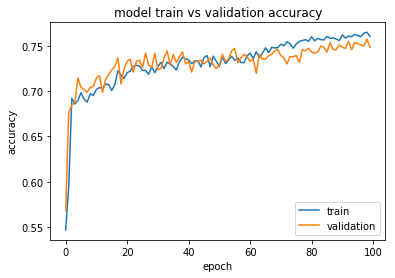

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.35      0.43        89
          1       0.83      0.68      0.75       241
          2       0.74      0.87      0.80       434

avg / total       0.75      0.75      0.74       764

Accuracy score: 0.748691099476
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[105   0 153]
 [  1 255 131]
 [ 41 109 709]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.41      0.52       258
          1       0.70      0.66      0.68       387
          2       0.

In [56]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile4, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile4.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile4)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 5

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.9424 - acc: 0.5460 - val_loss: 0.9467 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.9060 - acc: 0.5624 - val_loss: 0.7645 - val_acc: 0.6819
Epoch 3/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.7264 - acc: 0.6903 - val_loss: 0.7333 - val_acc: 0.6767
Epoch 4/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.6937 - acc: 0.6953 - val_loss: 0.7809 - val_acc: 0.6479
Epoch 5/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.6866 - acc: 0.7054 - val_loss: 0.7092 - val_acc: 0.6898
Epoch 6/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.6835 - acc: 0.6933 - val_loss: 0.6732 - val_acc: 0.7029
Epoch 7/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.6706 - acc: 0.7093

3055/3055 [==============================] - 10s 3ms/step - loss: 0.5286 - acc: 0.7682 - val_loss: 0.5494 - val_acc: 0.7631
Epoch 60/100
3055/3055 [==============================] - 11s 3ms/step - loss: 0.5300 - acc: 0.7696 - val_loss: 0.5435 - val_acc: 0.7683
Epoch 61/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5286 - acc: 0.7686 - val_loss: 0.5570 - val_acc: 0.7539
Epoch 62/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5283 - acc: 0.7643 - val_loss: 0.5746 - val_acc: 0.7474
Epoch 63/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5285 - acc: 0.7637 - val_loss: 0.5448 - val_acc: 0.7552
Epoch 64/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5226 - acc: 0.7696 - val_loss: 0.5415 - val_acc: 0.7657
Epoch 65/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.5274 - acc: 0.7715 - val_loss: 0.5426 - val_acc: 0.7618
Epoch 66/100
3055/3055 [==============================

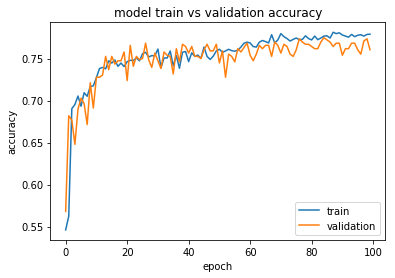

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.35      0.44        89
          1       0.81      0.73      0.77       241
          2       0.76      0.86      0.81       434

avg / total       0.75      0.76      0.75       764

Accuracy score: 0.760471204188
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 99   0 159]
 [  1 261 125]
 [ 39  61 759]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.38      0.50       258
          1       0.81      0.67      0.74       387
          2       0.

In [57]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile5, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile5.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile5)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 6

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 17s 6ms/step - loss: 0.9525 - acc: 0.5417 - val_loss: 0.9409 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.8920 - acc: 0.5741 - val_loss: 0.8833 - val_acc: 0.6113
Epoch 3/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.7464 - acc: 0.6782 - val_loss: 0.6650 - val_acc: 0.7382
Epoch 4/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.6362 - acc: 0.7444 - val_loss: 0.7320 - val_acc: 0.6832
Epoch 5/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.6400 - acc: 0.7391 - val_loss: 0.6486 - val_acc: 0.7395
Epoch 6/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.6324 - acc: 0.7421 - val_loss: 0.6465 - val_acc: 0.7408
Epoch 7/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.6252 - acc: 0.7404

3055/3055 [==============================] - 12s 4ms/step - loss: 0.4656 - acc: 0.7895 - val_loss: 0.5010 - val_acc: 0.7853
Epoch 60/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.4639 - acc: 0.7899 - val_loss: 0.5066 - val_acc: 0.7801

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 61/100
3055/3055 [==============================] - 13s 4ms/step - loss: 0.4621 - acc: 0.7948 - val_loss: 0.5024 - val_acc: 0.7840
Epoch 62/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.4609 - acc: 0.7948 - val_loss: 0.5013 - val_acc: 0.7827
Epoch 63/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.4608 - acc: 0.7961 - val_loss: 0.4949 - val_acc: 0.7762
Epoch 64/100
3055/3055 [==============================] - 13s 4ms/step - loss: 0.4600 - acc: 0.7905 - val_loss: 0.4961 - val_acc: 0.7788
Epoch 65/100
3055/3055 [==============================] - 13s 4ms/step - loss: 0.4603 - acc: 0.7961 - val_loss

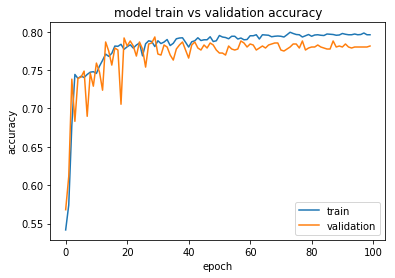

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.57      0.42      0.48        89
          1       0.86      0.76      0.81       241
          2       0.78      0.87      0.82       434

avg / total       0.78      0.78      0.78       764

Accuracy score: 0.781413612565
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[131   0 127]
 [  2 270 115]
 [ 51  44 764]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.51      0.59       258
          1       0.86      0.70      0.77       387
          2       0.

In [58]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile6, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile6.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile6)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 7

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.9420 - acc: 0.5516 - val_loss: 0.9356 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.8562 - acc: 0.6016 - val_loss: 0.7175 - val_acc: 0.6937
Epoch 3/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.6366 - acc: 0.7411 - val_loss: 0.6296 - val_acc: 0.7408
Epoch 4/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.6241 - acc: 0.7430 - val_loss: 0.6283 - val_acc: 0.7435
Epoch 5/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.6063 - acc: 0.7470 - val_loss: 0.6157 - val_acc: 0.7513
Epoch 6/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.5931 - acc: 0.7558 - val_loss: 0.5895 - val_acc: 0.7657
Epoch 7/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.5951 - acc: 0.7502

3055/3055 [==============================] - 14s 5ms/step - loss: 0.4402 - acc: 0.8082 - val_loss: 0.4816 - val_acc: 0.7984
Epoch 59/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.4377 - acc: 0.8088 - val_loss: 0.4774 - val_acc: 0.8010
Epoch 60/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.4357 - acc: 0.8092 - val_loss: 0.4823 - val_acc: 0.7945
Epoch 61/100
3055/3055 [==============================] - 15s 5ms/step - loss: 0.4364 - acc: 0.8049 - val_loss: 0.4766 - val_acc: 0.7997

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 62/100
3055/3055 [==============================] - 15s 5ms/step - loss: 0.4343 - acc: 0.8111 - val_loss: 0.4811 - val_acc: 0.8024
Epoch 63/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.4349 - acc: 0.8088 - val_loss: 0.4821 - val_acc: 0.7984
Epoch 64/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.4344 - acc: 0.8085 - val_loss

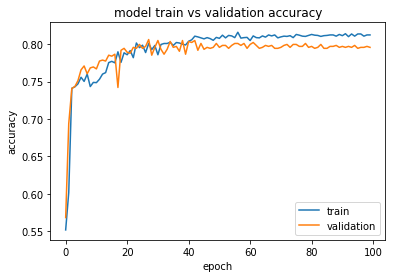

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.45      0.51        89
          1       0.85      0.81      0.83       241
          2       0.80      0.86      0.83       434

avg / total       0.79      0.80      0.79       764

Accuracy score: 0.795811518325
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[144   0 114]
 [  0 292  95]
 [ 60  71 728]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.56      0.62       258
          1       0.80      0.75      0.78       387
          2       0.

In [59]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile7, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile7.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile7)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 8

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 21s 7ms/step - loss: 0.9419 - acc: 0.5516 - val_loss: 0.9367 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.9239 - acc: 0.5460 - val_loss: 0.8801 - val_acc: 0.5681
Epoch 3/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.7150 - acc: 0.6858 - val_loss: 0.6127 - val_acc: 0.7592
Epoch 4/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.5794 - acc: 0.7705 - val_loss: 0.5681 - val_acc: 0.7762
Epoch 5/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.5641 - acc: 0.7764 - val_loss: 0.5729 - val_acc: 0.7683
Epoch 6/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.5666 - acc: 0.7741 - val_loss: 0.5515 - val_acc: 0.7775
Epoch 7/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.5435 - acc: 0.7771

3055/3055 [==============================] - 16s 5ms/step - loss: 0.4055 - acc: 0.8223 - val_loss: 0.4231 - val_acc: 0.8089
Epoch 60/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4053 - acc: 0.8213 - val_loss: 0.4227 - val_acc: 0.8141
Epoch 61/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4031 - acc: 0.8232 - val_loss: 0.4524 - val_acc: 0.8010
Epoch 62/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4048 - acc: 0.8216 - val_loss: 0.4213 - val_acc: 0.8076
Epoch 63/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4102 - acc: 0.8196 - val_loss: 0.4753 - val_acc: 0.7919
Epoch 64/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4060 - acc: 0.8200 - val_loss: 0.4457 - val_acc: 0.8063
Epoch 65/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.4050 - acc: 0.8252 - val_loss: 0.4624 - val_acc: 0.8050

Epoch 00065: ReduceLROnPlateau reducing learning rate

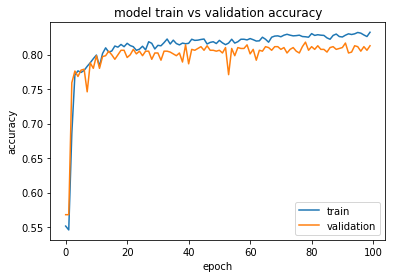

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.52      0.56        89
          1       0.88      0.82      0.85       241
          2       0.82      0.87      0.84       434

avg / total       0.81      0.81      0.81       764

Accuracy score: 0.812827225131
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[131   2 125]
 [  1 333  53]
 [ 45 135 679]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.74      0.51      0.60       258
          1       0.71      0.86      0.78       387
          2       0.

In [60]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile8, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile8.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile8)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 9

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 23s 7ms/step - loss: 0.9436 - acc: 0.5470 - val_loss: 0.9541 - val_acc: 0.5681
Epoch 2/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.8321 - acc: 0.6213 - val_loss: 0.7040 - val_acc: 0.6688
Epoch 3/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.6277 - acc: 0.7417 - val_loss: 0.7044 - val_acc: 0.7238
Epoch 4/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.5877 - acc: 0.7758 - val_loss: 0.6460 - val_acc: 0.7369
Epoch 5/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.5854 - acc: 0.7637 - val_loss: 0.5879 - val_acc: 0.7631
Epoch 6/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.5536 - acc: 0.7787 - val_loss: 0.5447 - val_acc: 0.7736
Epoch 7/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.5473 - acc: 0.7807

3055/3055 [==============================] - 18s 6ms/step - loss: 0.3972 - acc: 0.8282 - val_loss: 0.4097 - val_acc: 0.8115
Epoch 60/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.4067 - acc: 0.8272 - val_loss: 0.4144 - val_acc: 0.8037
Epoch 61/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.4041 - acc: 0.8275 - val_loss: 0.4682 - val_acc: 0.7762
Epoch 62/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.4036 - acc: 0.8268 - val_loss: 0.4600 - val_acc: 0.7866
Epoch 63/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.4063 - acc: 0.8206 - val_loss: 0.4115 - val_acc: 0.8154
Epoch 64/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.3988 - acc: 0.8255 - val_loss: 0.4065 - val_acc: 0.8168

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 65/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.3896 - acc: 0.8275 - val_loss

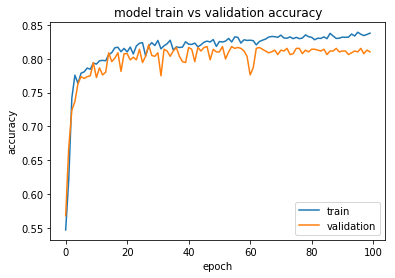

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.52      0.55        89
          1       0.87      0.83      0.85       241
          2       0.82      0.86      0.84       434

avg / total       0.81      0.81      0.81       764

Accuracy score: 0.810209424084
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[154   0 104]
 [  1 317  69]
 [ 59  48 752]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.72      0.60      0.65       258
          1       0.87      0.82      0.84       387
          2       0.

In [61]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile9, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile9.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_Decile9)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 10

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/70
3055/3055 [==============================] - 24s 8ms/step - loss: 0.9354 - acc: 0.5430 - val_loss: 0.8326 - val_acc: 0.7552
Epoch 2/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.7098 - acc: 0.7021 - val_loss: 0.6923 - val_acc: 0.6924
Epoch 3/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.6186 - acc: 0.7588 - val_loss: 0.5564 - val_acc: 0.7932
Epoch 4/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.5861 - acc: 0.7705 - val_loss: 0.7723 - val_acc: 0.6649
Epoch 5/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.5833 - acc: 0.7768 - val_loss: 0.5423 - val_acc: 0.7997
Epoch 6/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.5562 - acc: 0.7863 - val_loss: 0.9803 - val_acc: 0.6361
Epoch 7/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.5487 - acc: 0.7879 - val_

3055/3055 [==============================] - 20s 7ms/step - loss: 0.3519 - acc: 0.8462 - val_loss: 0.3829 - val_acc: 0.8377
Epoch 61/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.3503 - acc: 0.8504 - val_loss: 0.3857 - val_acc: 0.8364
Epoch 62/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.3501 - acc: 0.8462 - val_loss: 0.3762 - val_acc: 0.8377
Epoch 63/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.3490 - acc: 0.8475 - val_loss: 0.3790 - val_acc: 0.8390
Epoch 64/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.3487 - acc: 0.8504 - val_loss: 0.3875 - val_acc: 0.8246
Epoch 65/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.3499 - acc: 0.8556 - val_loss: 0.3932 - val_acc: 0.8377
Epoch 66/70
3055/3055 [==============================] - 20s 7ms/step - loss: 0.3492 - acc: 0.8507 - val_loss: 0.3793 - val_acc: 0.8351
Epoch 67/70
3055/3055 [==============================] - 20s

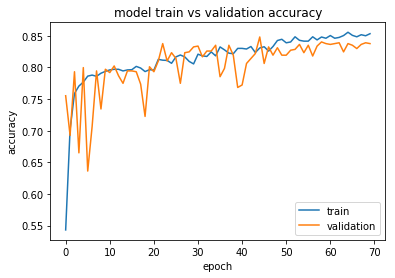

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.63      0.48      0.55        89
          1       0.92      0.85      0.89       241
          2       0.83      0.90      0.86       434

avg / total       0.83      0.84      0.83       764

Accuracy score: 0.837696335079
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[132   0 126]
 [  0 335  52]
 [ 44  40 775]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.51      0.61       258
          1       0.89      0.87      0.88       387
          2       0.

In [51]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_3D, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

y_train_HE = np.array(pd.get_dummies(y_train))
y_val_HE = np.array(pd.get_dummies(y_val))

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile10.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(3, activation='softmax'))

FFF_model.compile(optimizer=RMSprop(lr=0.005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.00001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train_HE, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val_HE), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict_classes(X_val)

    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict_classes(FFF_Test_3D)
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))

print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))

## LSTM Course BBB

Fit LSTM Course BBB - 2 Target Classes
Train on 3708 samples, validate on 1490 samples
Epoch 1/300
3708/3708 [==============================] - 42s 11ms/step - loss: 0.7103 - acc: 0.2983 - val_loss: 0.7273 - val_acc: 0.2268
Epoch 2/300
3708/3708 [==============================] - 41s 11ms/step - loss: 0.7028 - acc: 0.3050 - val_loss: 0.7154 - val_acc: 0.2268
Epoch 3/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6961 - acc: 0.4029 - val_loss: 0.7046 - val_acc: 0.2403
Epoch 4/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6899 - acc: 0.6033 - val_loss: 0.6944 - val_acc: 0.4819
Epoch 5/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6842 - acc: 0.6855 - val_loss: 0.6844 - val_acc: 0.7242
Epoch 6/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6783 - acc: 0.7017 - val_loss: 0.6741 - val_acc: 0.7611
Epoch 7/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6723 - acc

Epoch 60/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4294 - acc: 0.7996 - val_loss: 0.5921 - val_acc: 0.6208
Epoch 61/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4259 - acc: 0.7991 - val_loss: 0.5904 - val_acc: 0.6242
Epoch 62/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4236 - acc: 0.8034 - val_loss: 0.5902 - val_acc: 0.6282
Epoch 63/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4209 - acc: 0.8064 - val_loss: 0.5884 - val_acc: 0.6329
Epoch 64/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4179 - acc: 0.8088 - val_loss: 0.5762 - val_acc: 0.6463
Epoch 65/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4166 - acc: 0.8085 - val_loss: 0.5918 - val_acc: 0.6289
Epoch 66/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4143 - acc: 0.8099 - val_loss: 0.5928 - val_acc: 0.6302
Epoch 67/300
3708/3708 [==========

3708/3708 [==============================] - 39s 11ms/step - loss: 0.2884 - acc: 0.8897 - val_loss: 0.3670 - val_acc: 0.8611
Epoch 179/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2882 - acc: 0.8910 - val_loss: 0.3745 - val_acc: 0.8584
Epoch 180/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2882 - acc: 0.8916 - val_loss: 0.3688 - val_acc: 0.8604
Epoch 181/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2875 - acc: 0.8905 - val_loss: 0.3917 - val_acc: 0.8517
Epoch 182/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2870 - acc: 0.8913 - val_loss: 0.3652 - val_acc: 0.8611
Epoch 183/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2871 - acc: 0.8910 - val_loss: 0.3833 - val_acc: 0.8544
Epoch 184/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2867 - acc: 0.8913 - val_loss: 0.3720 - val_acc: 0.8597
Epoch 185/300
3708/3708 [================

3708/3708 [==============================] - 39s 10ms/step - loss: 0.2771 - acc: 0.8948 - val_loss: 0.3740 - val_acc: 0.8517
Epoch 238/300
3708/3708 [==============================] - 39s 10ms/step - loss: 0.2778 - acc: 0.8959 - val_loss: 0.4061 - val_acc: 0.8383
Epoch 239/300
3708/3708 [==============================] - 39s 10ms/step - loss: 0.2763 - acc: 0.8962 - val_loss: 0.3624 - val_acc: 0.8591
Epoch 240/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2772 - acc: 0.8959 - val_loss: 0.3922 - val_acc: 0.8416
Epoch 241/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2770 - acc: 0.8967 - val_loss: 0.3896 - val_acc: 0.8423
Epoch 242/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2757 - acc: 0.8943 - val_loss: 0.3490 - val_acc: 0.8591
Epoch 243/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2773 - acc: 0.8935 - val_loss: 0.3746 - val_acc: 0.8477
Epoch 244/300
3708/3708 [================

3708/3708 [==============================] - 39s 11ms/step - loss: 0.2688 - acc: 0.8970 - val_loss: 0.3760 - val_acc: 0.8416
Epoch 297/300
3708/3708 [==============================] - 40s 11ms/step - loss: 0.2695 - acc: 0.8972 - val_loss: 0.3906 - val_acc: 0.8416
Epoch 298/300
3708/3708 [==============================] - 41s 11ms/step - loss: 0.2683 - acc: 0.8970 - val_loss: 0.3741 - val_acc: 0.8430
Epoch 299/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2691 - acc: 0.8970 - val_loss: 0.3788 - val_acc: 0.8423
Epoch 300/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2688 - acc: 0.8978 - val_loss: 0.3786 - val_acc: 0.8423


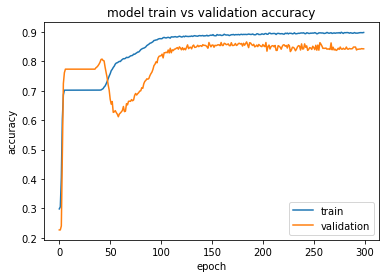

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.83      0.70       338
          1       0.94      0.85      0.89      1152

avg / total       0.87      0.84      0.85      1490

Accuracy score: 0.842281879195


In [44]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

BBB_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
BBB_model.compile(optimizer=RMSprop(lr=0.000007), loss='categorical_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit([BBB_Train_3D,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([BBB_Test_3D, BBB_AUX_Test], BBB_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_BBB = BBB_model.predict_classes([BBB_Test_3D, BBB_AUX_Test])
y_pred_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_BBB, y_true=BBB_Test_Targets_1D)))

Fit LSTM Course DDD - 2 Target Classes
Train on 2687 samples, validate on 1121 samples
Epoch 1/300
2687/2687 [==============================] - 29s 11ms/step - loss: 0.6983 - acc: 0.3796 - val_loss: 0.6956 - val_acc: 0.4630
Epoch 2/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.6928 - acc: 0.4968 - val_loss: 0.6893 - val_acc: 0.5968
Epoch 3/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.6871 - acc: 0.6357 - val_loss: 0.6831 - val_acc: 0.6744
Epoch 4/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6817 - acc: 0.6758 - val_loss: 0.6771 - val_acc: 0.7065
Epoch 5/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6766 - acc: 0.6766 - val_loss: 0.6715 - val_acc: 0.7065
Epoch 6/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6714 - acc: 0.6766 - val_loss: 0.6660 - val_acc: 0.7065
Epoch 7/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6661 - acc

Epoch 60/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.3896 - acc: 0.8504 - val_loss: 0.3721 - val_acc: 0.8394
Epoch 61/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3872 - acc: 0.8485 - val_loss: 0.3704 - val_acc: 0.8394
Epoch 62/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3848 - acc: 0.8523 - val_loss: 0.3685 - val_acc: 0.8403
Epoch 63/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3826 - acc: 0.8508 - val_loss: 0.3669 - val_acc: 0.8412
Epoch 64/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3806 - acc: 0.8493 - val_loss: 0.3656 - val_acc: 0.8403
Epoch 65/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3785 - acc: 0.8515 - val_loss: 0.3645 - val_acc: 0.8412
Epoch 66/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3767 - acc: 0.8523 - val_loss: 0.3631 - val_acc: 0.8448
Epoch 67/300
2687/2687 [==========

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2635 - acc: 0.8895 - val_loss: 0.3102 - val_acc: 0.8680
Epoch 179/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2631 - acc: 0.8884 - val_loss: 0.3096 - val_acc: 0.8698
Epoch 180/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2627 - acc: 0.8880 - val_loss: 0.3099 - val_acc: 0.8671
Epoch 181/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2622 - acc: 0.8872 - val_loss: 0.3122 - val_acc: 0.8689
Epoch 182/300
2687/2687 [==============================] - 28s 11ms/step - loss: 0.2625 - acc: 0.8876 - val_loss: 0.3122 - val_acc: 0.8662
Epoch 183/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2620 - acc: 0.8887 - val_loss: 0.3131 - val_acc: 0.8680
Epoch 184/300
2687/2687 [==============================] - 28s 11ms/step - loss: 0.2614 - acc: 0.8884 - val_loss: 0.3111 - val_acc: 0.8671
Epoch 185/300
2687/2687 [================

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2513 - acc: 0.8895 - val_loss: 0.3165 - val_acc: 0.8715
Epoch 238/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2503 - acc: 0.8884 - val_loss: 0.3145 - val_acc: 0.8680
Epoch 239/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2500 - acc: 0.8887 - val_loss: 0.3160 - val_acc: 0.8715
Epoch 240/300
2687/2687 [==============================] - 29s 11ms/step - loss: 0.2497 - acc: 0.8884 - val_loss: 0.3142 - val_acc: 0.8671
Epoch 241/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2498 - acc: 0.8887 - val_loss: 0.3224 - val_acc: 0.8671
Epoch 242/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2496 - acc: 0.8910 - val_loss: 0.3152 - val_acc: 0.8715
Epoch 243/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2494 - acc: 0.8891 - val_loss: 0.3223 - val_acc: 0.8671
Epoch 244/300
2687/2687 [================

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2433 - acc: 0.8898 - val_loss: 0.3175 - val_acc: 0.8698
Epoch 297/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2437 - acc: 0.8910 - val_loss: 0.3233 - val_acc: 0.8707
Epoch 298/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2437 - acc: 0.8910 - val_loss: 0.3178 - val_acc: 0.8724
Epoch 299/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2431 - acc: 0.8906 - val_loss: 0.3196 - val_acc: 0.8724
Epoch 300/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2431 - acc: 0.8910 - val_loss: 0.3145 - val_acc: 0.8715


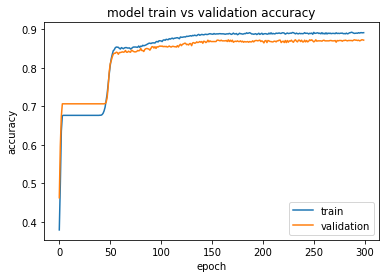

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.62      0.74       329
          1       0.86      0.97      0.91       792

avg / total       0.88      0.87      0.86      1121

Accuracy score: 0.871543264942


In [45]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

DDD_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
DDD_model.compile(optimizer=RMSprop(lr=0.000007), loss='categorical_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit([DDD_Train_3D,DDD_AUX_Train], DDD_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([DDD_Test_3D, DDD_AUX_Test], DDD_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_DDD = DDD_model.predict_classes([DDD_Test_3D, DDD_AUX_Test])

    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_DDD, y_true=DDD_Test_Targets_1D)))
    

In [48]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

FFF_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
FFF_model.compile(optimizer=RMSprop(lr=0.000005), loss='categorical_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit([FFF_Train_3D,FFF_AUX_Train], FFF_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([FFF_Test_3D, FFF_AUX_Test], FFF_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_FFF = FFF_model.predict_classes([FFF_Test_3D, FFF_AUX_Test])
y_pred_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_pred_FFF, y_true=FFF_Test_Targets_1D)))
    

Fit LSTM Course FFF - 2 Target Classes
Train on 3659 samples, validate on 1466 samples
Epoch 1/300
3659/3659 [==============================] - 43s 12ms/step - loss: 0.6965 - acc: 0.4026 - val_loss: 0.6949 - val_acc: 0.4188
Epoch 2/300
3659/3659 [==============================] - 39s 11ms/step - loss: 0.6958 - acc: 0.4250 - val_loss: 0.6940 - val_acc: 0.4570
Epoch 3/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6950 - acc: 0.4523 - val_loss: 0.6931 - val_acc: 0.4986
Epoch 4/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6943 - acc: 0.4816 - val_loss: 0.6923 - val_acc: 0.5334
Epoch 5/300
3659/3659 [==============================] - 40s 11ms/step - loss: 0.6936 - acc: 0.4960 - val_loss: 0.6914 - val_acc: 0.5723
Epoch 6/300
3659/3659 [==============================] - 39s 11ms/step - loss: 0.6928 - acc: 0.5141 - val_loss: 0.6905 - val_acc: 0.6085
Epoch 7/300
3659/3659 [==============================] - 40s 11ms/step - loss: 0.6921 - acc

Epoch 60/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6420 - acc: 0.6917 - val_loss: 0.6208 - val_acc: 0.7619
Epoch 61/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6407 - acc: 0.6917 - val_loss: 0.6188 - val_acc: 0.7619
Epoch 62/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6395 - acc: 0.6917 - val_loss: 0.6169 - val_acc: 0.7619
Epoch 63/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6382 - acc: 0.6917 - val_loss: 0.6150 - val_acc: 0.7619
Epoch 64/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6369 - acc: 0.6917 - val_loss: 0.6130 - val_acc: 0.7619
Epoch 65/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6357 - acc: 0.6917 - val_loss: 0.6110 - val_acc: 0.7619
Epoch 66/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6344 - acc: 0.6917 - val_loss: 0.6090 - val_acc: 0.7619
Epoch 67/300
3659/3659 [==========

KeyboardInterrupt: 